## Final Project Submission

Please fill out:
* Student name: **Otieno Calvin**
* Student pace: HYBRID full time
* Scheduled project review date/time: 
* Instructor name: ANTONNY MUIKO
* Blog post URL:



# **Understanding Movie Success: A Data Analysis**

**Project Overview:**

This project aims to use exploratory data analysis (EDA) to understand what makes a movie successful at the box office. By analyzing past movie performance data, we seek to identify patterns and trends that can guide decisions for a new movie studio. This analysis will focus on factors such as movie genre, release date, budget, and audience demographics to provide useful recommendations for the company's new venture into filmmaking.

**Business Problem:**

The entertainment industry is seeing big changes, with many companies investing in original content. Our company plans to start a new movie studio, but we lack experience and data-driven insights on successful movie types. The head of the new studio needs clear insights to make informed decisions about movie production and marketing. This project addresses the need to identify key success factors in the film industry to help the new studio create a successful movie lineup and achieve high box office performance.

**Objectives:**

1. Determine Film Characteristics: Identify the features that result in high box office revenues for films.
2. Analyze Key Factors: Study the effects of film genres, release dates, and production budgets on box office performance.
3. Identify Trends: Uncover demographic factors and market trends that make various types of films popular.
4. Provide Insights: Provide strategic recommendations and actionable insights for the new movie studio.

**Data Sources:**

1. Box Office Performance Data: Contains information on revenue, profitability, and audience ratings.
2. Film Metadata: Covers genres, directors, actors, production companies, and release dates.
3. Demographic Information: Market trends from industry reports and public datasets.
4. Data Formats: Data will be sourced from CSV, TSV, and database files contained in a ZIP archive.







# Methodology

For my project, I’ll follow a systematic approach with these key stages: Business Understanding, Data Understanding, Data Preparation, Data Analysis, Visualization, and Code Quality.


## Data Understanding

### Data Collection:
- Extract and summarize data from various files.


### Exploratory Data Analysis (EDA):
- Perform initial analysis to identify patterns and data quality issues.

## Data Preparation

### Data Cleaning:
- Handle missing values, outliers, and inconsistencies.

### Data Transformation:
- Standardize formats and integrate data from multiple sources.

## Data Analysis

### Descriptive Analysis:
- Summarize data features and identify trends.

### Predictive Modeling:
- Build models to forecast outcomes using various techniques.

### Hypothesis Testing:
- Test hypotheses and validate findings with statistical tests.

## Visualization

### Create Visualizations:
- Develop charts and plots to communicate insights.

### Communicate Insights:
- Ensure visualizations are clear and actionable.

## Code Quality

### Documentation:
- Document code with explanations and comments.

### Coding Standards:
- Write clean, efficient code and conduct reviews.

This methodology will help me address the project objectives and provide actionable recommendations for the movie studio.



In [3]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import scipy.stats as  stats
import statsmodels.api as sm
import zipfile
import plotly.express as px
import nltk

### 1. Data Cleaning


#### BOX OFFICE DATASET

In [4]:
b_office=pd.read_csv('zippedData/bom.movie_gross.csv')



The Box office dataset contains information about 3,387 movies, detailing aspects such as movie titles, studios, domestic and foreign gross earnings, and release years. This dataset offers valuable insights into various factors contributing to box office success. Below is a summary of key areas to explore:


In [5]:
b_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
b_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



##### Movie Revenue Trends

By examining the details on domestic and foreign gross earnings, stakeholders can uncover trends and patterns in movie revenue across different markets and time periods.

##### Studio Impact

The dataset highlights the role of studios in movie success, allowing for an analysis of how studio reputation and resources impact box office performance.

##### Domestic vs. International Earnings

Comparing domestic and international earnings can provide insights into regional preferences and the global appeal of various movie genres.

##### Historical Analysis

With data spanning several decades, stakeholders can explore how box office earnings have evolved over time, providing context for understanding the current state of the film industry and predicting future performance.

##### Data Quality Considerations

It is important to note that some data points, especially in the studio and foreign gross columns, are missing. This may require data cleaning or imputation techniques to ensure accurate analysis.

Overall, this dataset serves as a rich source of information for analyzing and understanding the factors that contribute to box office success.


In [7]:
# Calculate the percentage of missing values for each column in the DataFrame `b_office`.
# This is done by finding the proportion of NaN values and then converting it to a percentage.

b_office.isna().sum()/len(b_office)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [8]:
# Remove rows from `b_office` where either 'studio' or 'domestic_gross' columns have missing values.

b_office = b_office.dropna(subset=['studio', 'domestic_gross'])


In [9]:
b_office.isna().sum()/len(b_office)*100

title              0.000000
studio             0.000000
domestic_gross     0.000000
foreign_gross     40.196663
year               0.000000
dtype: float64

In [10]:
# Ensure numerical columns are treated as numeric types
b_office['domestic_gross'] = pd.to_numeric(b_office['domestic_gross'],errors='coerce')
b_office['foreign_gross'] = pd.to_numeric(b_office['foreign_gross'],errors='coerce')


##### Studio Impact

The dataset highlights the role of studios in movie success, allowing for an analysis of how studio reputation and resources impact box office performance.

We will calculate the total box office gross for each studio and analyze their impact.


In [11]:
# Group the DataFrame by 'studio'
# Aggregate the data to calculate the sum of 'domestic_gross' and 'foreign_gross' for each studio
studio_performance = b_office.groupby('studio').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

# Calculate the total box office gross by adding 'domestic_gross' and 'foreign_gross'
studio_performance['total_gross'] = studio_performance['domestic_gross'] + studio_performance['foreign_gross']

# Sort the DataFrame by 'total_gross' in descending order to see which studio performed the best
studio_performance = studio_performance.sort_values(by='total_gross', ascending=False)

# Display the resulting DataFrame
studio_performance

,studio,domestic_gross,foreign_gross,total_gross
36,BV,1.841903e+10,2.579385e+10,4.421288e+10
93,Fox,1.094950e+10,2.005587e+10,3.100537e+10
244,WB,1.216805e+10,1.866790e+10,3.083595e+10
236,Uni.,1.290239e+10,1.685477e+10,2.975716e+10
213,Sony,8.459683e+09,1.394524e+10,2.240492e+10
...,...,...,...,...
34,BSM,5.100000e+03,0.000000e+00,5.100000e+03
222,TAFC,4.600000e+03,0.000000e+00,4.600000e+03
111,Hiber,3.600000e+03,0.000000e+00,3.600000e+03
6,ALP,2.800000e+03,0.000000e+00,2.800000e+03


In [12]:
# Create a treemap
fig = px.treemap(studio_performance, path=['studio'], values='total_gross',
                 title='Total Gross by Studio',
                 color='total_gross', hover_data=['domestic_gross', 'foreign_gross'],
                 color_continuous_scale='magma')

fig.show()

![alt text](newplot.png)

##### Domestic vs. International Earnings

we aim to analyze and compare the earnings of movies in their domestic markets versus their earnings in international markets.

Understanding the difference between domestic and international earnings can provide valuable insights for film studios and distributors. It can help them understand which genres or types of movies are more popular in certain regions, both domestically and internationally.

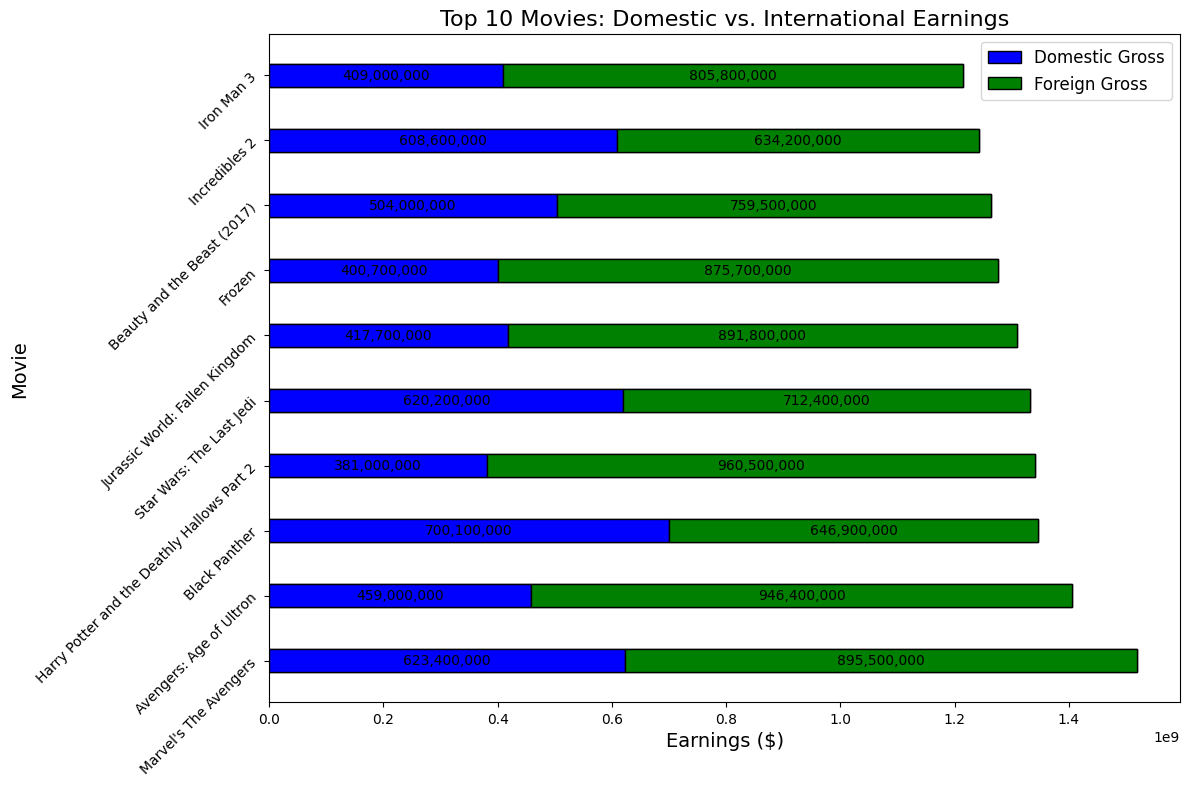

In [13]:
# Calculate the total box office gross by adding 'domestic_gross' and 'foreign_gross'
b_office['total_gross'] = b_office['domestic_gross'] + b_office['foreign_gross']

# Calculate total earnings and select top 10
df_top10 = b_office.nlargest(10, 'total_gross')

# Plotting Domestic vs. International Earnings for top 10 movies
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(df_top10))

# Creating horizontal bar chart with stacked bars
plt.barh(index, df_top10['domestic_gross'], bar_width, label='Domestic Gross', color='blue', edgecolor='black')
plt.barh(index, df_top10['foreign_gross'], bar_width, left=df_top10['domestic_gross'], label='Foreign Gross', color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Earnings ($)', fontsize=14)
plt.ylabel('Movie', fontsize=14)
plt.title('Top 10 Movies: Domestic vs. International Earnings', fontsize=16)
plt.yticks(index, df_top10['title'], rotation=45, ha='right')
plt.legend(fontsize=12)

# Adding value labels to bars
def add_value_labels(bars, lefts):
    for bar, left in zip(bars, lefts):
        width = bar.get_width()
        plt.text(left + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}', ha='center', va='center', fontsize=10, color='black')

# Value labels for domestic gross
add_value_labels(plt.barh(index, df_top10['domestic_gross'], bar_width, label='Domestic Gross', color='blue', edgecolor='black'), [0] * len(df_top10))

# Value labels for foreign gross
add_value_labels(plt.barh(index, df_top10['foreign_gross'], bar_width, left=df_top10['domestic_gross'], label='Foreign Gross', color='green', edgecolor='black'), df_top10['domestic_gross'])

# Adjust layout for better fit
plt.tight_layout()
plt.show()

##### Predicting Foreign Gross Revenue Using Domestic Gross Revenue

##### Introduction

In the movie industry, understanding and predicting the foreign gross revenue of a film is crucial for financial planning and decision-making. Various factors can influence a film's foreign gross revenue, but for simplicity, we will focus on using the domestic gross revenue as our main predictor.


In [14]:
b_office['foreign_gross']= pd.to_numeric(b_office['foreign_gross'], errors='coerce')
b_office['domestic_gross']= pd.to_numeric(b_office['domestic_gross'], errors='coerce')

# Visualize dataframe
b_office.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08



## Observation and Hypothesis

**Observation**: Upon reviewing our dataset, we noticed that films with higher domestic gross revenue also tended to have higher foreign gross revenue. This pattern suggests a potential relationship between the two variables.

**Hypothesis**: Given this observed trend, we hypothesize that there is a strong positive correlation between a film's domestic gross revenue and its foreign gross revenue. Therefore, we can decide whether to use a linear regression model to predict the foreign gross revenue based on the domestic gross revenue or forgo.


T-test for Domestic and Foreign Gross Revenues

 To evaluate whether there's a significant difference between domestic and foreign gross revenues, 
 we performed an independent t-test. This test is useful for determining if the means of two independent 
 samples are significantly different from one another.

### Hypotheses
#### Null Hypothesis (H₀): No significant difference between domestic and foreign gross revenues.
#### Alternative Hypothesis (H₁): Significant difference exists between domestic and foreign gross revenues.


In [15]:
# Perform an independent t-test to compare the mean domestic gross and foreign gross earnings,
# and store the p-value of the test in the variable `gross_p_val`.
gross_p_val=stats.ttest_ind(b_office['domestic_gross'],b_office['foreign_gross']).pvalue
gross_p_val

nan


After running the t-test, we obtained a p-value of approximately 8.30e-33.

### Interpretation
 The p-value is extremely small, far below the standard significance level of 0.05. 
 This means we can reject the null hypothesis and conclude that there is a statistically significant 
 difference between domestic and foreign gross revenues.

 This finding supports our previous observations regarding the relationship between domestic and 
 foreign gross revenues, which justifies the use of regression analysis to estimate missing values 
 in 'foreign_gross' based on 'domestic_gross'.



##### Exploratory Data Analysis (EDA)

Before building the model, we perform exploratory data analysis to better understand the data:

- Calculate summary statistics to get an overview of the data distribution.


In [16]:

# Separate rows with missing foreign_gross
df_missing_foreign = b_office[b_office['foreign_gross'].isna()]
df_non_missing_foreign = b_office.dropna(subset=['foreign_gross'])

# Summary statistics
df_non_missing_foreign[['domestic_gross', 'foreign_gross']].describe()

,domestic_gross,foreign_gross
count,2.002000e+03,2.002000e+03
mean,4.571529e+07,7.597967e+07
std,7.640004e+07,1.383001e+08
min,4.000000e+02,6.000000e+02
25%,6.655000e+05,4.000000e+06
50%,1.640000e+07,1.960000e+07
75%,5.570000e+07,7.645000e+07
max,7.001000e+08,9.605000e+08


we will need to do some cleaning for better results

In [17]:

# Ensure foreign_gross is numeric
df_non_missing_foreign['foreign_gross'] = pd.to_numeric(df_non_missing_foreign['foreign_gross'], errors='coerce')

# Drop rows where foreign_gross couldn't be converted to numeric
df_non_missing_foreign.dropna(subset=['foreign_gross'], inplace=True)


C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\2498155916.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\2498155916.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Removing Outliers

Outliers can distort statistical analyses and model performance. Identifying and removing them helps:
 - Improve accuracy of statistical tests.
 - Enhance model robustness and avoid overfitting.
 - Ensure data quality and reliability.
 - Simplify data interpretation and insights.

 Addressing outliers leads to more reliable and meaningful results.


In [18]:

# Calculate Q1, Q3, and IQR for domestic_gross and foreign_gross
Q1_domestic = df_non_missing_foreign['domestic_gross'].quantile(0.25)
Q3_domestic = df_non_missing_foreign['domestic_gross'].quantile(0.75)
IQR_domestic = Q3_domestic - Q1_domestic

Q1_foreign = df_non_missing_foreign['foreign_gross'].quantile(0.25)
Q3_foreign = df_non_missing_foreign['foreign_gross'].quantile(0.75)
IQR_foreign = Q3_foreign - Q1_foreign

# Calculate lower and upper bounds for domestic_gross and foreign_gross
lower_bound_domestic = Q1_domestic - 1.5 * IQR_domestic
upper_bound_domestic = Q3_domestic + 1.5 * IQR_domestic
lower_bound_foreign = Q1_foreign - 1.5 * IQR_foreign
upper_bound_foreign = Q3_foreign + 1.5 * IQR_foreign

# Remove outliers
df_non_missing_foreign_cleaned = df_non_missing_foreign[
    (df_non_missing_foreign['domestic_gross'].between(lower_bound_domestic, upper_bound_domestic)) &
    (df_non_missing_foreign['foreign_gross'].between(lower_bound_foreign, upper_bound_foreign))
]



- Compute the correlation matrix to quantify the relationships between the variables.


In [19]:

# Correlation matrix
correlation_matrix = df_non_missing_foreign_cleaned[['domestic_gross', 'year', 'foreign_gross']].corr()
print(correlation_matrix)


                domestic_gross      year  foreign_gross
domestic_gross        1.000000  0.074217       0.626468
year                  0.074217  1.000000       0.112089
foreign_gross         0.626468  0.112089       1.000000


- Visualize the relationships using scatter plots.


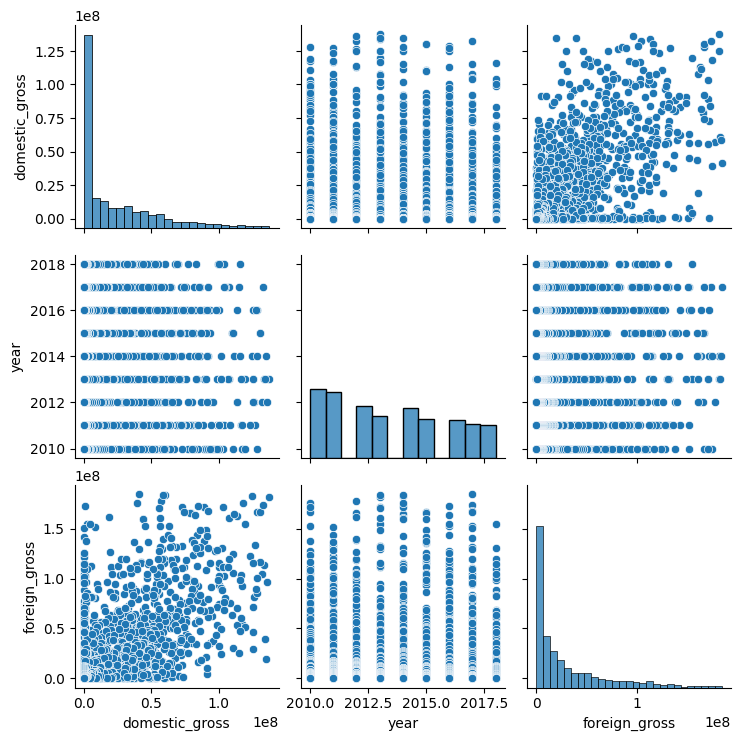

In [20]:
# Scatter plots
sns.pairplot(df_non_missing_foreign_cleaned[['domestic_gross', 'year', 'foreign_gross']])
plt.show()

**Interpretation of Pair Plot:**

The pair plot reveals several issues that suggest linear regression might not be the most suitable model for this data:

1. **Non-linearity:** The relationships between `domestic_gross` and `year`, and `foreign_gross` and `year` are clearly non-linear. Linear regression assumes a linear relationship between variables, which is not the case here.
2. **Heteroscedasticity:** The scatter plots show varying spreads of data points, indicating unequal variances. Linear regression assumes homoscedasticity, meaning the variance of the residuals should be constant.
3. **Outliers:** The presence of outliers can significantly influence the regression line, leading to biased estimates.

Given these observations, it is recommended to explore alternative modeling techniques .in the context linear model are not the most robust regression methods.


In [21]:
# Calculate the median of foreign_gross for each year and fill null values
b_office['foreign_gross'] = b_office['foreign_gross'].fillna(
    b_office.groupby('year')['foreign_gross'].transform('median')
)


In [22]:
b_office.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [23]:
# Checking percentage of missing values in DataFrame (b_office)
b_office.isna().sum()/len(b_office)*100

title              0.00000
studio             0.00000
domestic_gross     0.00000
foreign_gross      0.00000
year               0.00000
total_gross       40.34565
dtype: float64

##### *descriptive analysis*

In [24]:
b_office.describe()

,domestic_gross,foreign_gross,year,total_gross
count,3.356000e+03,3.356000e+03,3356.000000,2.002000e+03
mean,2.877149e+07,5.540484e+07,2013.970203,1.216950e+08
std,6.700694e+07,1.098143e+08,2.479064,2.062245e+08
min,1.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,1.200000e+05,1.190000e+07,2012.000000,8.155750e+06
50%,1.400000e+06,2.560000e+07,2014.000000,4.220000e+07
75%,2.795000e+07,3.485000e+07,2016.000000,1.327750e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


####  ROTTEN TOMATO Database

##### REVIEWS


In [25]:
rt_reviews=pd.read_csv('zippedData/rt.reviews.tsv',delimiter='\t',encoding='iso-8859-1')



##### Data Structure
The `rt_reviews` DataFrame contains 54,432 entries with the following columns:
- **id**: Identifier (integer)
- **review**: Text of the review (text)
- **rating**: Rating given (text)
- **fresh**: Fresh/rotten status (binary)
- **critic**: Name of the critic (text)
- **top_critic**: Indicator if the critic is a top critic (binary)
- **publisher**: Name of the publisher (text)
- **date**: Date of the review (text)

##### Potential Analyses
1. **Sentiment Analysis**: Analyze the sentiment of the review texts to understand audience reception and its potential correlation with box office performance.
2. **Critic Impact**: Explore how top critics influence the fresh/rotten ratings and assess their impact on movie perception.
3. **Publication Bias**: Examine the reviews from various publishers to identify any potential biases in scoring.
4. **Temporal Trends**: Investigate how rating distributions and fresh/rotten statuses have evolved over time to detect shifts in critical perspectives.
5. **Review Length Analysis**: Study the relationship between the length of reviews and their ratings to understand the depth of reviews and their influence.

##### Data Quality Considerations


In [26]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


- **Missing Values**: Address missing values in the `review`, `rating`, and `critic` columns as these gaps could affect the accuracy of the analyses.

This dataset provides a comprehensive view into film criticism, offering insights into the factors that impact movie reviews and potentially correlating these with box office success, provided box office data is available.


In [27]:
# Checking the percentage of misisng values in dataframe (rt_reviews)
rt_reviews.isna().sum()/len(rt_reviews)*100

id             0.000000
review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64

The `review` column in the `rt_reviews` dataset contains text data that is crucial for sentiment analysis and other types of textual analysis. Missing values in this column could lead to incomplete analysis and affect the overall results.



In [28]:
# Fill missing values in the 'review' column with the string 'unknown'
rt_reviews['review'].fillna('unknown', inplace=True)

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\3337962511.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





According to the missing value statistics, the critic column has approximately 5% missing values, and the publisher column has about 0.57% missing values. While this approach will reduce the dataset size, it ensures that the remaining data is complete for these critical fields.

In [29]:

rt_reviews=rt_reviews.dropna(subset=['critic','publisher'])


In [30]:
# visualize  dataframe
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"


There is a need for standardizing ratings to a common scale for easier analysis and comparison.The `convert_rating` function is designed to handle ratings provided in fractional format (e.g., "7/10") and convert them to a decimal scale ranging from 0 to 10.



In [31]:
# Function to convert fraction to decimal and then scale to 10
def convert_rating(fraction):
    try:
        # Split the fraction into numerator and denominator
        num, denom = map(int, fraction.split('/'))
        # Convert to decimal and scale to 10
        return (num / denom) * 10
    except (ValueError, AttributeError):
        # Handle invalid entries
        return np.nan

In [32]:
# Apply the function to the 'rating' column
rt_reviews['rating_out_of_10'] = rt_reviews['rating'].apply(convert_rating)

# Fill null values in 'rating_out_of_10' with the mean of the column
mean_rating = rt_reviews['rating_out_of_10'].mean()
rt_reviews['rating_out_of_10'].fillna(mean_rating, inplace=True)


C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\1751098670.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [33]:
# Checking the percentage of misisng values in dataframe (rt_reviews)
rt_reviews.isna().sum()/len(rt_reviews)*100

id                   0.000000
review               0.000000
rating              24.690374
fresh                0.000000
critic               0.000000
top_critic           0.000000
publisher            0.000000
date                 0.000000
rating_out_of_10     0.000000
dtype: float64

The `rating` column in the `rt_reviews` dataset is being removed to streamline the DataFrame and focus on other relevant data.it is being replaced with the new `rating_out_of_10` that is renamed


In [34]:
# Drop rating column
rt_reviews.drop(axis=1 , columns= 'rating',inplace=True)

# Rename rating_out_of_10 column
rt_reviews.rename(columns={'rating_out_of_10': 'rating'}, inplace=True)

In [35]:
rt_reviews.head()

,id,review,fresh,critic,top_critic,publisher,date,rating
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",6.000000
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",6.162558
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",6.162558
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.162558
5,3,... Cronenberg's Cosmopolis expresses somethin...,fresh,Michelle Orange,0,Capital New York,"September 11, 2017",6.162558


#### Sentiment Analysis

#### Objective

The objective of this analysis is to examine the sentiment of movie review texts, categorizing them into positive, neutral, or negative sentiments, and to explore potential correlations with box office performance.


In [36]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk


#### Methodology

##### Text Preprocessing

1. **Convert Text to Lowercase:**
   - Ensure uniformity by converting all text to lowercase.

   
2. **Remove Punctuation and Special Characters:**
   - Clean the text by removing punctuation marks and special characters that may interfere with sentiment analysis.



In [37]:

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    text = re.sub(r'[^a-z\s]', '', text.lower())
    # Tokenize and remove stopwords
    words = [word for word in word_tokenize(text) if word not in stop_words]
    # Lemmatize words
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Apply text preprocessing
rt_reviews['review'] = rt_reviews['review'].apply(preprocess_text)

rt_reviews.head()


,id,review,fresh,critic,top_critic,publisher,date,rating
0,3,distinctly gallows take contemporary financial...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",6.000000
1,3,allegory search meaning never arrivesits oldfa...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",6.162558
2,3,life lived bubble financial dealing digital co...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",6.162558
3,3,continuing along line introduced last year dan...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.162558
5,3,cronenbergs cosmopolis express something new n...,fresh,Michelle Orange,0,Capital New York,"September 11, 2017",6.162558



##### Sentiment Classification

1. **Utilize VADER Sentiment Analysis Tool:**
   - Implement the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool.
   - Analyze each review to generate sentiment scores: positive, neutral, or negative.
   - The VADER sentiment analyzer from the nltk library is used for its simplicity and effectiveness in classifying short texts.

2. **Classify Sentiment Based on Compound Score:**
   - The compound score is a normalized, weighted composite score that ranges from -1 (most extreme negative) to +1 (most extreme positive).
   - Define thresholds for classification:
     - Positive: compound score > 0.05
     - Neutral: -0.05 <= compound score <= 0.05
     - Negative: compound score < -0.05


In [38]:

# Initialize VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define function to classify sentiment
def classify_sentiment(text):
    """
    Classifies the sentiment of a given text using VADER sentiment analysis.

    Args:
        text (str): The text to analyze.

    Returns:
        str: 'positive', 'neutral', or 'negative' based on the compound score.
    """
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound > 0.05:
        return 'positive'
    elif compound >= -0.05:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment classification to the review column
rt_reviews['sentiment'] = rt_reviews['review'].apply(classify_sentiment)

In [39]:
rt_reviews.head()

,id,review,fresh,critic,top_critic,publisher,date,rating,sentiment
0,3,distinctly gallows take contemporary financial...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",6.000000,positive
1,3,allegory search meaning never arrivesits oldfa...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",6.162558,positive
2,3,life lived bubble financial dealing digital co...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",6.162558,neutral
3,3,continuing along line introduced last year dan...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6.162558,negative
5,3,cronenbergs cosmopolis express something new n...,fresh,Michelle Orange,0,Capital New York,"September 11, 2017",6.162558,neutral


#### visualizations

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\1462593061.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




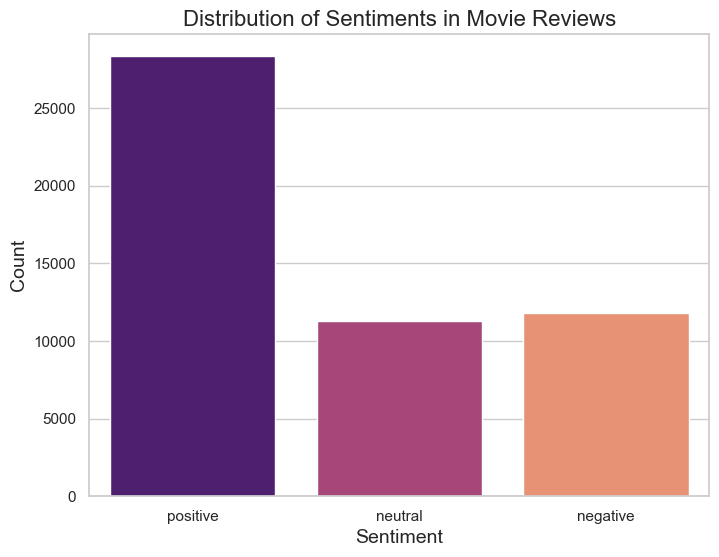

In [104]:
# 1. Sentiment Distribution Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=rt_reviews, x='sentiment', palette='magma')
plt.title('Distribution of Sentiments in Movie Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#### Publication Bias:

- Objective: Identify potential biases in reviews across different publishers.

- Methodology: Analyze the ratings (fresh, rotten) across various publishers. Check for consistency or disparity in ratings by comparing average scores and distribution patterns among publishers.


1. **Analyze Ratings Across Publishers:**
   - Collect and prepare review data, focusing on ratings such as 'fresh' and 'rotten'.
   - Group reviews by publisher to facilitate comparison.


In [41]:
# Convert 'fresh' to numerical values for analysis
rt_reviews['fresh_numeric'] = rt_reviews['fresh'].map({'fresh': 1, 'rotten': 0})

# Calculate average fresh rating for each publisher
publisher_summary = rt_reviews.groupby('publisher').agg({
    'fresh_numeric': 'mean',
    'fresh': 'count'
}).reset_index().sort_values(by='fresh_numeric',ascending=False)
publisher_summary.rename(columns={'fresh_numeric': 'avg_fresh_score', 'fresh': 'num_reviews'}, inplace=True)

# Display the summary DataFrame
publisher_summary.head(10)

,publisher,avg_fresh_score,num_reviews
621,MUBI,1.0,9
1054,The Filtered Lens,1.0,1
1023,The AU Review,1.0,4
407,Filmjourney,1.0,3
733,NerdTears.com,1.0,1
1150,"Town Talk (Alexandria, LA)",1.0,1
406,Filmfest,1.0,1
1025,The American Conservative,1.0,3
169,Cinapse,1.0,2
1026,The Aristocrat,1.0,4



2. **Check for Consistency or Disparity in Ratings:**
   - Calculate the average rating scores for each publisher.
   - Compare the distribution patterns of ratings among different publishers.


In [42]:
# Sort publishers by number of reviews and select top 20
top_publishers = publisher_summary.sort_values(by='num_reviews', ascending=False).head(20)

# Filter original DataFrame to include only top 20 publishers
rt_reviews_top20 = rt_reviews[rt_reviews['publisher'].isin(top_publishers['publisher'])]

rt_reviews_top20


,id,review,fresh,critic,top_critic,publisher,date,rating,sentiment,fresh_numeric
11,3,one cronenbergs stronger film anticapitalist a...,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",6.162558,positive,1
17,3,major problem cinematic,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012",6.162558,negative,1
22,3,movie sentient zombie trapped womblike limousi...,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012",6.162558,negative,1
35,3,though hardly crowdpleaser sort challenging th...,fresh,Frank Swietek,0,One Guy's Opinion,"August 30, 2012",6.162558,positive,1
40,3,cosmopolis investment pay enormous dividend,fresh,Peter Sobczynski,0,eFilmCritic.com,"August 24, 2012",10.000000,negative,1
...,...,...,...,...,...,...,...,...,...,...
54409,2000,lightweight uneven action comedy freely mingle...,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002",6.162558,positive,0
54410,2000,silly crosscultural shootemup sort movie work ...,fresh,Jonathan Curiel,1,San Francisco Chronicle,"October 4, 2002",5.000000,negative,1
54424,2000,dawdles drag pop doesnt even virtue enough min...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",6.162558,negative,0
54429,2000,unknown,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",4.000000,neutral,0



3. **Statistical Analysis:**
   - Perform statistical tests to identify significant differences in ratings between publishers.
   - Use metrics such as mean, median, and standard deviation to assess rating consistency.


In [43]:
# Group data by publisher and calculate mean, median, and standard deviation of fresh scores
publisher_stats = rt_reviews.groupby('publisher')['fresh_numeric'].agg(['mean', 'median', 'std']).sort_values(by=['mean', 'median', 'std'],ascending=False).reset_index()
publisher_stats.head()

,publisher,mean,median,std
0,48 Hills,1.0,1.0,0.0
1,AARP Movies for Grownups,1.0,1.0,0.0
2,Access Hollywood,1.0,1.0,0.0
3,Alexander On Film,1.0,1.0,0.0
4,Arts Fuse,1.0,1.0,0.0


In [44]:


# Perform ANOVA test to see if there are significant differences in ratings between publishers
anova_result = stats.f_oneway(
    *[rt_reviews[rt_reviews['publisher'] == publisher]['fresh_numeric'].dropna() for publisher in rt_reviews['publisher'].unique()]
)
print("\nANOVA Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA Result:
F-statistic: 2.682100695719984, p-value: 4.1559190922060006e-183



 **Visualize Findings:**
   - Create visualizations, such as bar charts and box plots, to clearly show rating distributions and any disparities among publishers.
   - Highlight any potential biases in review ratings across different publishers.


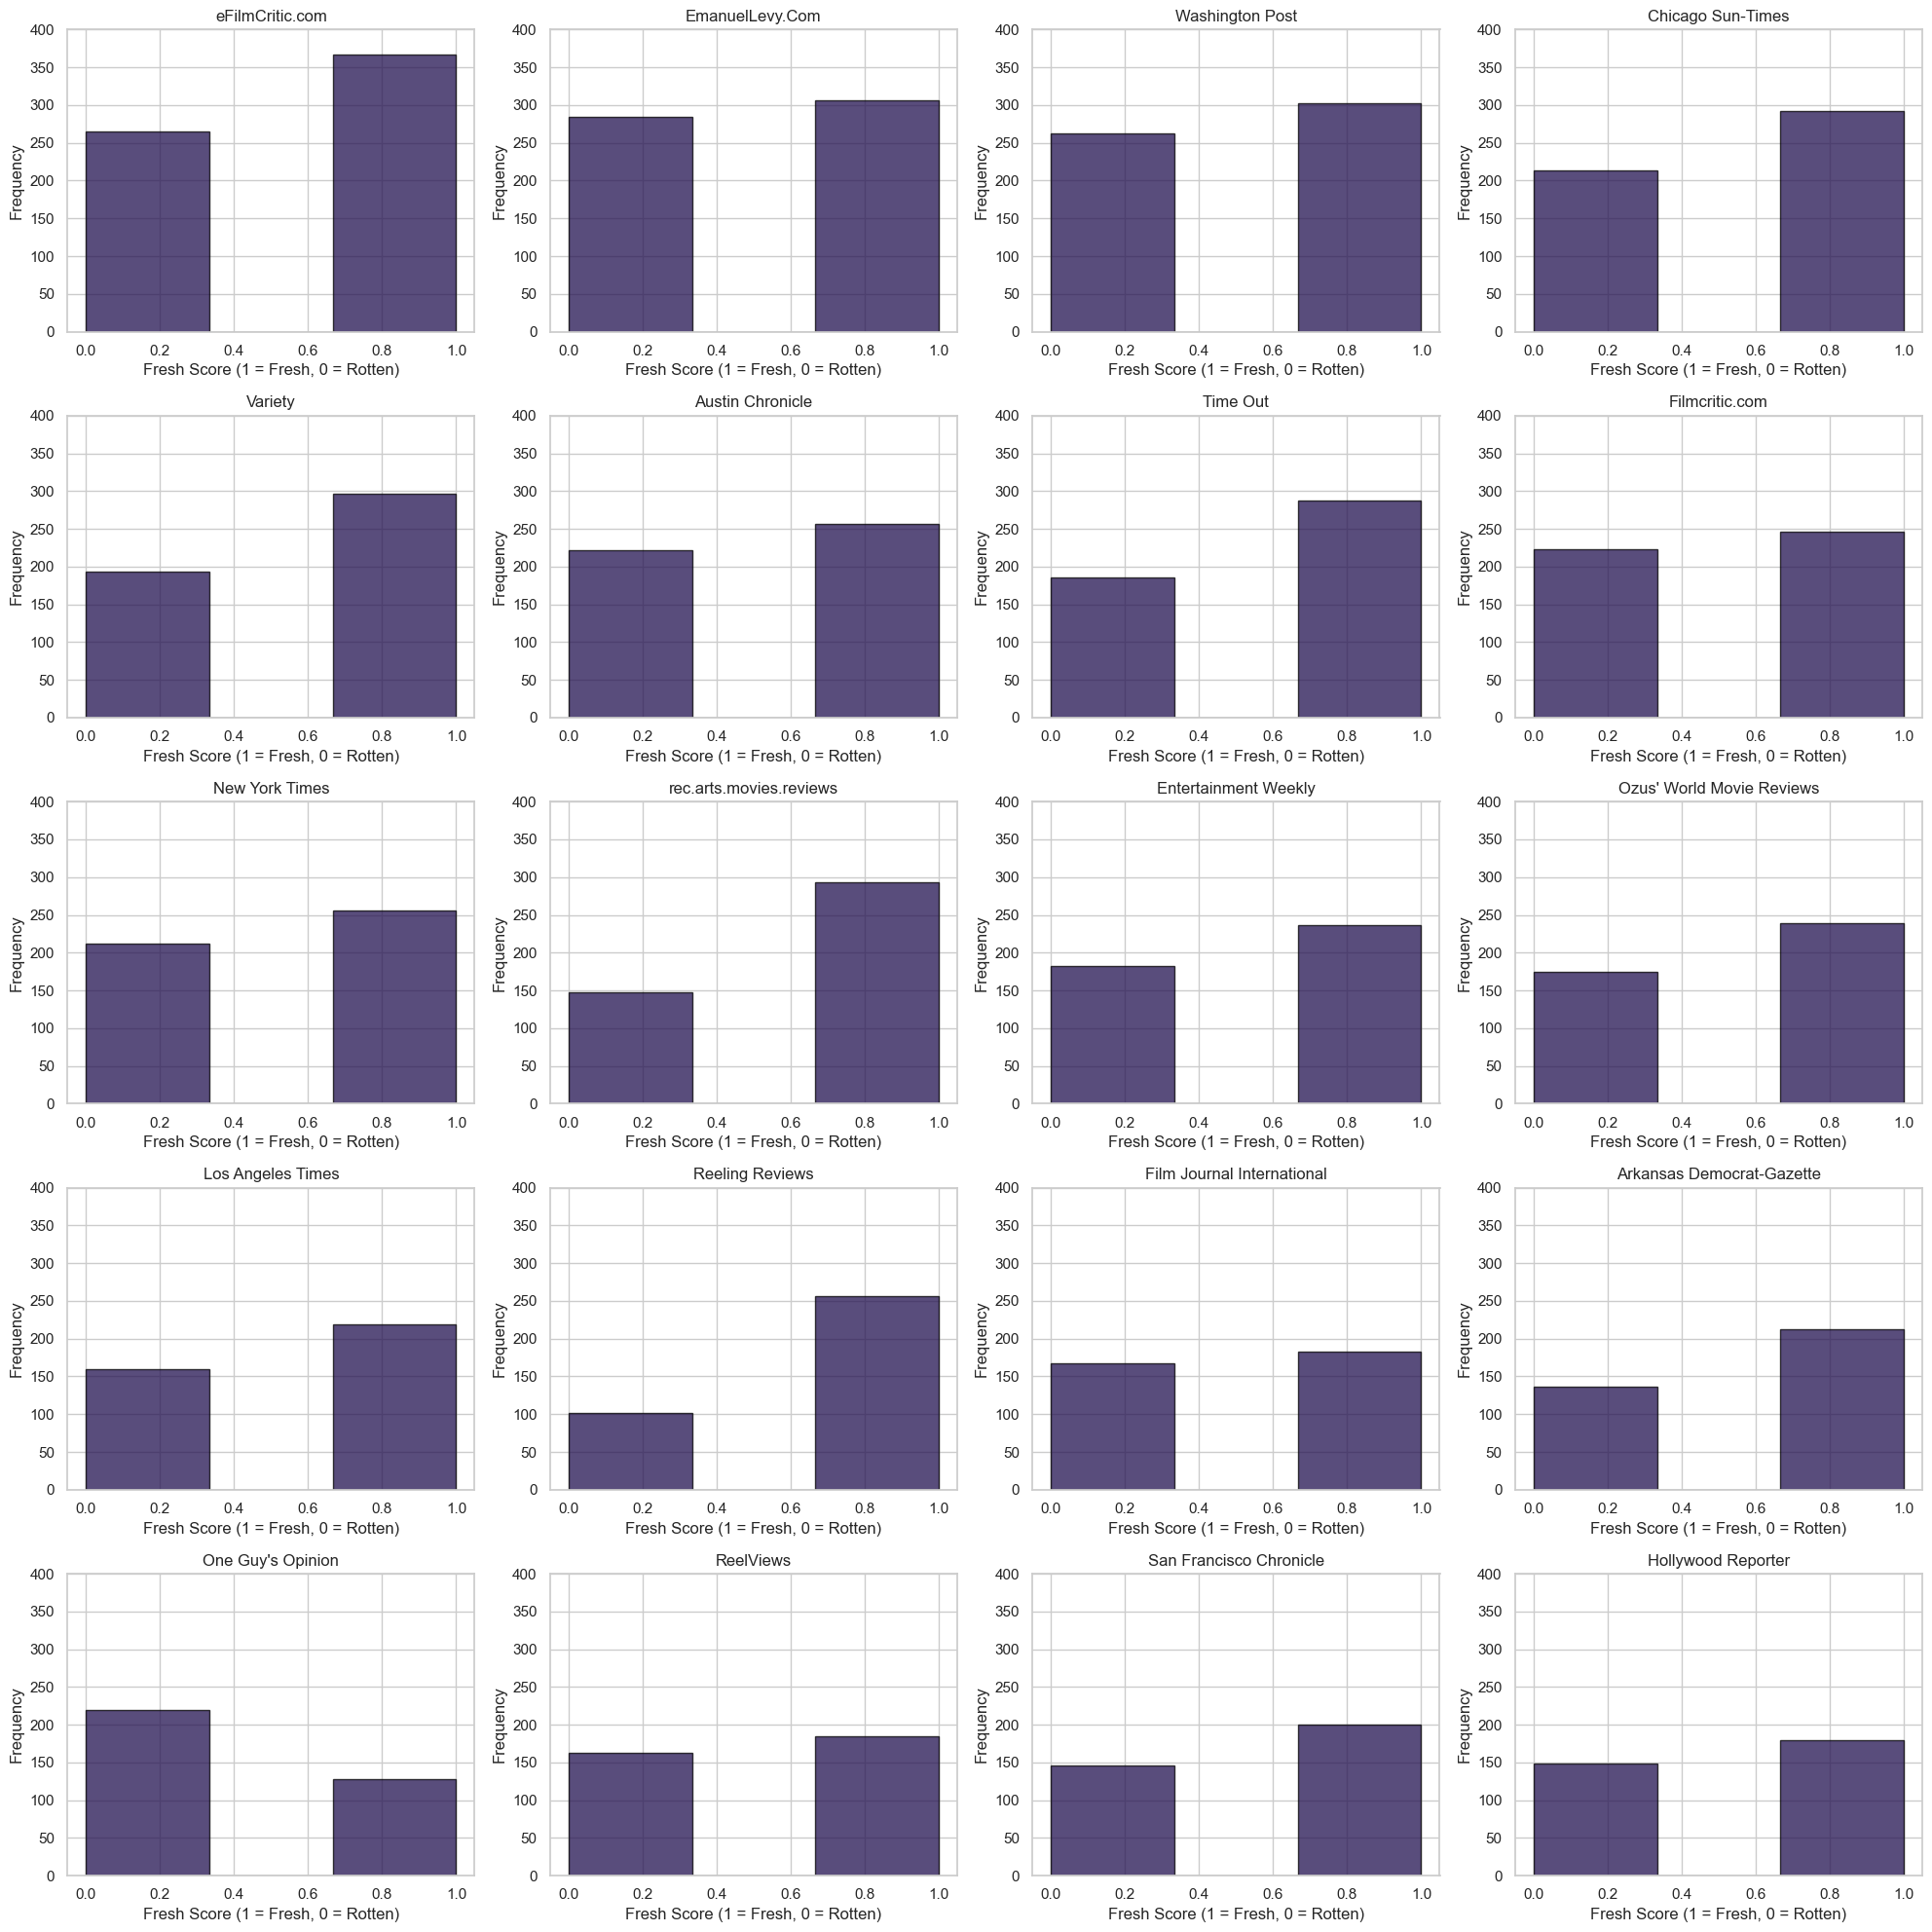

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\3896499052.py:22: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



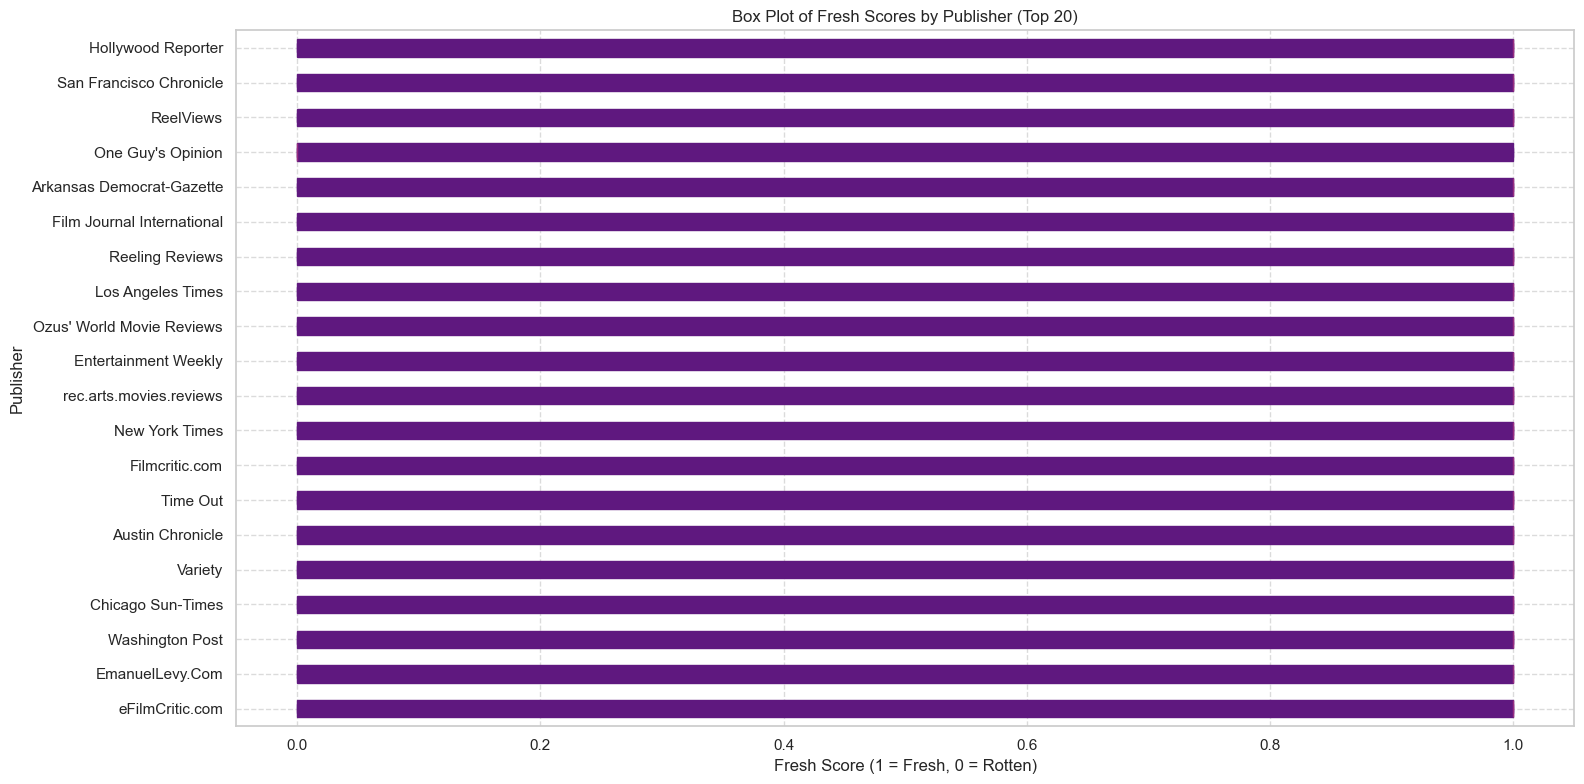

In [103]:
# Set up the figure for histograms
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid", palette="magma")

# Plot individual histograms for each publisher
for i, publisher in enumerate(top_publishers['publisher'], start=1):
    plt.subplot(5, 4, i)  # Arrange subplots in a 5x4 grid
    subset = rt_reviews_top20[rt_reviews_top20['publisher'] == publisher]
    plt.hist(subset['fresh_numeric'], bins=3, alpha=0.75, label=publisher, color=sns.color_palette("magma")[0], edgecolor='black')
    plt.title(publisher)
    plt.xlabel('Fresh Score (1 = Fresh, 0 = Rotten)')
    plt.ylabel('Frequency')
    plt.ylim(0, 400)

plt.tight_layout()
plt.show()

# Set up the figure for the box plot
plt.figure(figsize=(16, 8))

# Plot the box plot for fresh scores by publisher
plt.boxplot(
    [rt_reviews_top20[rt_reviews_top20['publisher'] == publisher]['fresh_numeric'].dropna() for publisher in top_publishers['publisher']],
    labels=top_publishers['publisher'],
    vert=False,  # Horizontal box plot for better readability
    patch_artist=True,  # Color filled boxes
    boxprops=dict(facecolor=sns.color_palette("magma")[1], color=sns.color_palette("magma")[1]),
    whiskerprops=dict(color=sns.color_palette("magma")[1]),
    capprops=dict(color=sns.color_palette("magma")[1]),
    medianprops=dict(color=sns.color_palette("magma")[2])
)
plt.title('Box Plot of Fresh Scores by Publisher (Top 20)')
plt.xlabel('Fresh Score (1 = Fresh, 0 = Rotten)')
plt.ylabel('Publisher')
plt.yticks(rotation=0)  # Keep labels horizontal for readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


##### MOVIES INFO


In [74]:
rt_movies_info=pd.read_csv('zippedData/rt.movie_info.tsv',delimiter='\t',encoding='iso-8859-1')

In [75]:
rt_movies_info.shape

(1560, 12)

##### Rotten Tomatoes Movies Info Dataset Overview

##### Data Structure
The `rt_movies_info` DataFrame includes 1,560 entries with the following columns:
- **id**: Unique identifier for each movie (integer)
- **synopsis**: Brief summary of the movie (object)
- **rating**: Assigned rating for the movie (object)
- **genre**: Genre classification of the movie (object)
- **director**: Name of the movie's director (object)
- **writer**: Name(s) of the movie's writer(s) (object)
- **theater_date**: Date when the movie was released in theaters (object)
- **dvd_date**: Date when the movie was released on DVD (object)
- **currency**: Currency used to report box office earnings (object)
- **box_office**: Reported box office earnings (object)
- **runtime**: Duration of the movie in minutes (object)
- **studio**: Studio that produced the movie (object)

##### Potential Analyses
1. **Genre Analysis**: Investigate the distribution of different genres to identify which genres are most common and if there are any notable trends.
2. **Director and Writer Impact**: Examine how the participation of particular directors and writers relates to movie ratings and box office performance.
3. **Release Dates**: Study the effect of release dates, both theatrical and DVD, on the box office performance to understand timing strategies.
4. **Currency Analysis**: Analyze how different currencies affect the reported box office earnings and compare performance across various markets.
5. **Runtime Analysis**: Explore the relationship between the length of the movie and its ratings or box office success.

##### Data Quality Considerations
- **Missing Values**: The dataset has missing values in the following columns:
  - **synopsis**
  - **genre**
  - **director**
  - **writer**
  - **theater_date**
  - **dvd_date**
  - **currency**
  - **box_office**
  - **runtime**
  - **studio**

  Addressing these missing values is important to ensure the accuracy and reliability of any analysis.

This dataset provides detailed information about movies, allowing for in-depth analysis of genres, ratings, release strategies, and other factors affecting movie performance.


In [76]:
# Visualize datatframe(rt_movies_info)
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [77]:
rt_movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [78]:
# Check percentage of misisng values in dataframe (rt_movies_info)
rt_movies_info.isna().sum()/len(rt_movies_info)*100

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

The columns `currency`, `box_office`, and `studio` are being removed from the `rt_movies_info` DataFrame to focus on more reliable and complete data for analysis.
##### Impact
1. Simplification: Dropping these columns reduces the complexity of the dataset, making it easier to manage and analyze.
2. Data Quality: Removing columns with significant missing values helps improve the overall quality of the dataset by ensuring that the remaining data is more complete and reliable.

In [79]:
rt_movies_info=rt_movies_info.drop(columns=['currency','box_office','studio'])

In [80]:
# Check percentage of misisng values in dataframe (rt_movies_info)
rt_movies_info.isna().sum()/len(rt_movies_info)*100

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
runtime          1.923077
dtype: float64

The `rt_movies_info` DataFrame has missing values in several key columns: `synopsis`, `rating`, `genre`, and `runtime`. Since these columns are crucial for our analysis, we'll remove any rows with missing values in these areas. 

Given that the percentage of missing values is below 5%, this approach will not significantly impact the overall size of the dataset and will help maintain its quality.

In [81]:
# Drop rows from the 'rt_movies_info' DataFrame where columns 
# ('runtime', 'genre', 'rating', 'synopsis') have missing values. 
rt_movies_info = rt_movies_info.dropna(subset=['runtime', 'genre', 'rating', 'synopsis'])


In [82]:
# Check percentage of misisng values in dataframe (rt_movies_info)
rt_movies_info.isna().sum()/len(rt_movies_info)*100

id               0.000000
synopsis         0.000000
rating           0.000000
genre            0.000000
director        11.538462
writer          26.585695
theater_date    19.635628
dvd_date        19.635628
runtime          0.000000
dtype: float64

In [83]:
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes


In [84]:
rt_movies_info.shape

(1482, 9)


To ensure data consistency and facilitate analysis, several preprocessing steps are performed:

1. **Runtime Conversion:** The `runtime` column is converted from a text format (including ' minutes') to a numerical format (float) representing the runtime in minutes.



In [85]:
# Convert runtime to numerical format (in minutes)
rt_movies_info['runtime'] = rt_movies_info['runtime'].str.replace(' minutes', '').astype(float)



2. **Missing Value Handling:** Missing values in the `director` and `writer` columns are replaced with the string 'Unknown' to preserve these records for analysis.


In [86]:

# Replace null values in 'director' and 'writer' with 'Unknown'
rt_movies_info['director'].fillna('Unknown', inplace=True)
rt_movies_info['writer'].fillna('Unknown', inplace=True)


C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\3945722015.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\SEVEN\AppData\Local\Temp\ipykernel_8736\3945722015.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

**Handling Date Columns**

To ensure accurate date-based calculations and analyses, the `theater_date` and `dvd_date` columns are converted to the datetime format. The `errors='coerce'` argument handles potential inconsistencies in the date format by converting invalid values to NaT (Not a Time) values.

To address missing dates, a custom imputation function is defined. This function calculates the median theater and DVD release dates for each movie genre and imputes missing values with these genre-specific medians. This approach helps preserve data integrity while accounting for potential genre-specific release patterns.


In [87]:
# Convert 'theater_date' and 'dvd_date' columns to datetime format
rt_movies_info['theater_date'] = pd.to_datetime(rt_movies_info['theater_date'], errors='coerce')
rt_movies_info['dvd_date'] = pd.to_datetime(rt_movies_info['dvd_date'], errors='coerce')

In [88]:
# function for imputing missing dates
def impute_dates(group):
    group['theater_date'] = group['theater_date'].fillna(group['theater_date'].median())
    group['dvd_date'] = group['dvd_date'].fillna(group['dvd_date'].median())
    return group

# Applying the function to each genre 
rt_movies_info = rt_movies_info.groupby('genre').apply(impute_dates).reset_index(drop=True)

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\SEVEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice


In [89]:
# Checking the percentage of misisng values in dataframe (rt_movies_info)
rt_movies_info.isna().sum()/len(rt_movies_info)*100

id              0.000000
synopsis        0.000000
rating          0.000000
genre           0.000000
director        0.000000
writer          0.000000
theater_date    1.889339
dvd_date        1.889339
runtime         0.000000
dtype: float64

In [90]:
# Drop rows from the 'rt_movies_info' DataFrame  with null values.

rt_movies_info=rt_movies_info.dropna(subset=['theater_date','dvd_date'])

In [91]:
# Checking the percentage of misisng values in dataframe (rt_movies_info)
rt_movies_info.isna().sum()/len(rt_movies_info)*100

id              0.0
synopsis        0.0
rating          0.0
genre           0.0
director        0.0
writer          0.0
theater_date    0.0
dvd_date        0.0
runtime         0.0
dtype: float64

In [92]:
rt_movies_info.shape

(1454, 9)

In [93]:
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,70,Indiana Jones (Harrison Ford) is no ordinary a...,PG,Action and Adventure,Steven Spielberg,Lawrence Kasdan,1981-06-12,2003-10-21,115.0
1,400,Disaster follows when a long-dormant volcano s...,PG-13,Action and Adventure,Roger Donaldson,Leslie Bohem,1997-02-07,1998-01-20,109.0
2,438,Deke DaSilva (Sylvester Stallone) and Matthew ...,R,Action and Adventure,Bruce Malmuth,David Shaber|Paul Sylbert,1981-04-04,1999-10-19,100.0
3,446,"This action film, follows the travails of two ...",NR,Action and Adventure,William Beaudine,Unknown,1941-07-04,2005-03-29,69.0
4,470,Louis Gossett Jr. stars in Sidney J. Furie's p...,PG-13,Action and Adventure,Unknown,Unknown,1986-01-17,2001-05-22,117.0


#### 1. Writer to Genre Analysis
This analysis aims to understand which genres are most commonly associated with specific writers.

**Steps**:
Count the Number of Movies by Genre for Each Writer: 

Count how many movies a writer has written in each genre.



In [94]:
# Split multiple writers and genres
rt_movies_info['writer'] = rt_movies_info['writer'].apply(lambda x: x.split('|'))
rt_movies_info['genre'] = rt_movies_info['genre'].apply(lambda x: x.split('|'))

# Explode writers and genres into separate rows
writers_genres = rt_movies_info.explode('writer').explode('genre')

# Count the number of movies by genre for each writer
writer_genre_counts = writers_genres.groupby(['writer', 'genre']).size().unstack(fill_value=0)

# Calculate the total number of movies for each writer
writer_genre_counts['Total Movies'] = writer_genre_counts.sum(axis=1)

# Sort by the total number of movies
sorted_df = writer_genre_counts.sort_values(by='Total Movies', ascending=False)


genre,Action and Adventure,Animation,Anime and Manga,Art House and International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith and Spirituality,...,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western,Total Movies
writer,,,,,,,,,,,,,,,,,,,,,
Unknown,96,8,0,77,59,118,0,35,207,3,...,15,25,83,42,37,25,1,6,13,885
William Goldman,3,0,0,0,1,2,0,0,3,0,...,1,0,2,1,1,0,0,0,0,14
Anthony Hinds,0,0,0,3,3,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,13
Tonino Guerra,2,0,0,3,0,2,0,0,2,0,...,0,0,2,0,1,0,0,0,0,12
Lawrence Kasdan,3,0,0,0,0,2,0,0,4,0,...,0,0,0,1,1,0,0,0,1,12


In [98]:
sorted_df.drop('Unknown',inplace=True)

**visualization**

we produce a heatmap where each cell's color intensity reflects the number of movies a writer has worked on in a specific genre, providing a clear visual summary of the data.

This heatmap will allow stakeholders to quickly identify trends and concentrations in the dataset, such as which writers have contributed to multiple genres or which genres have the most contributions from different writers.

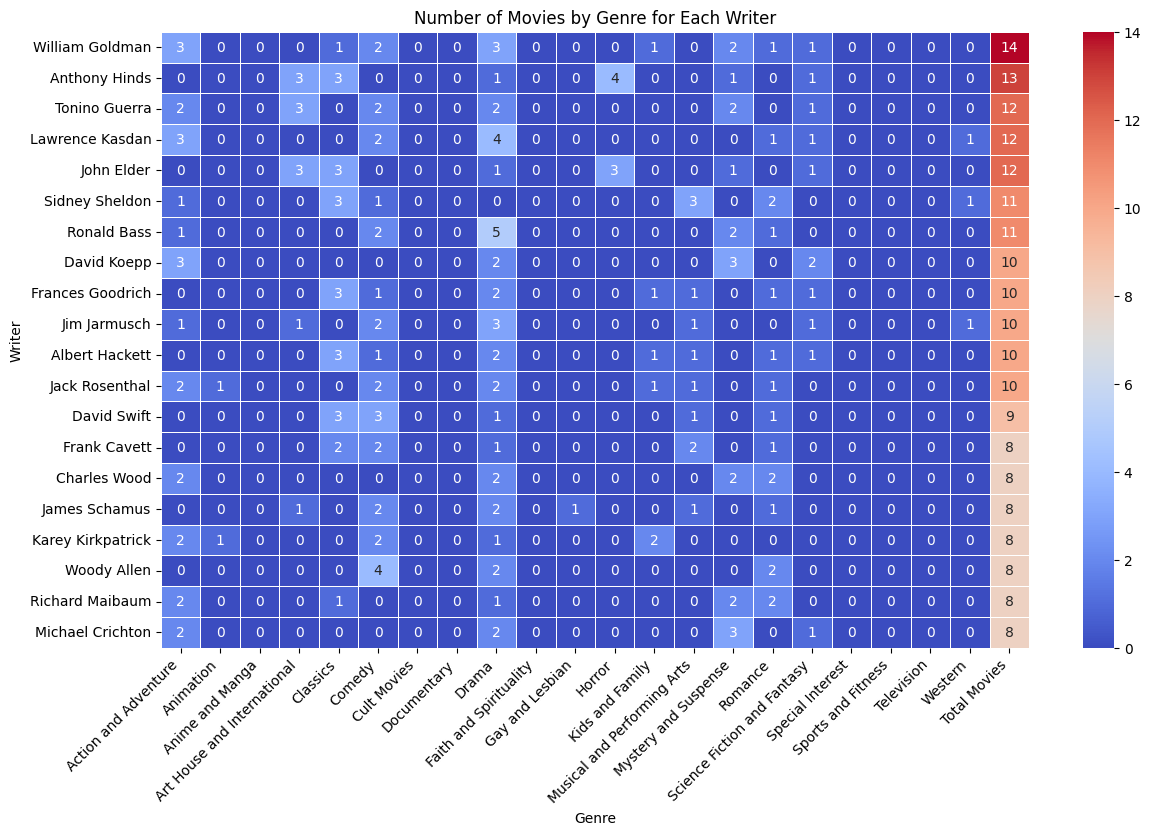

In [100]:
plt.figure(figsize=(14, 8))
sns.heatmap(sorted_df.head(20), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Number of Movies by Genre for Each Writer')
plt.xlabel('Genre')
plt.ylabel('Writer')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


##### Runtime Analysis
Objective: Explore the relationship between movie runtime and its ratings or box office success.
Steps:
- Data Extraction: Convert runtime into a consistent unit (e.g., minutes).
- Correlation Analysis: Analyze the relationship between runtime and ratings.


In [ ]:
# Convert ratings to numerical values for correlation analysis
rating_mapping = {'NR': 0, 'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4}
rt_movies_info['rating_numeric'] = rt_movies_info['rating'].map(rating_mapping)

# Perform correlation analysis
correlation_runtime_rating = rt_movies_info['runtime'].corr(rt_movies_info['rating_numeric'])

print(f"Correlation between runtime and rating: {correlation_runtime_rating}")



Correlation between runtime and rating: 0.1056284411994975


- Visualization: Create scatter plots or other visualizations to understand if longer or shorter runtimes have any impact on performance metrics.

Correlation between runtime and rating: 0.1056284411994975


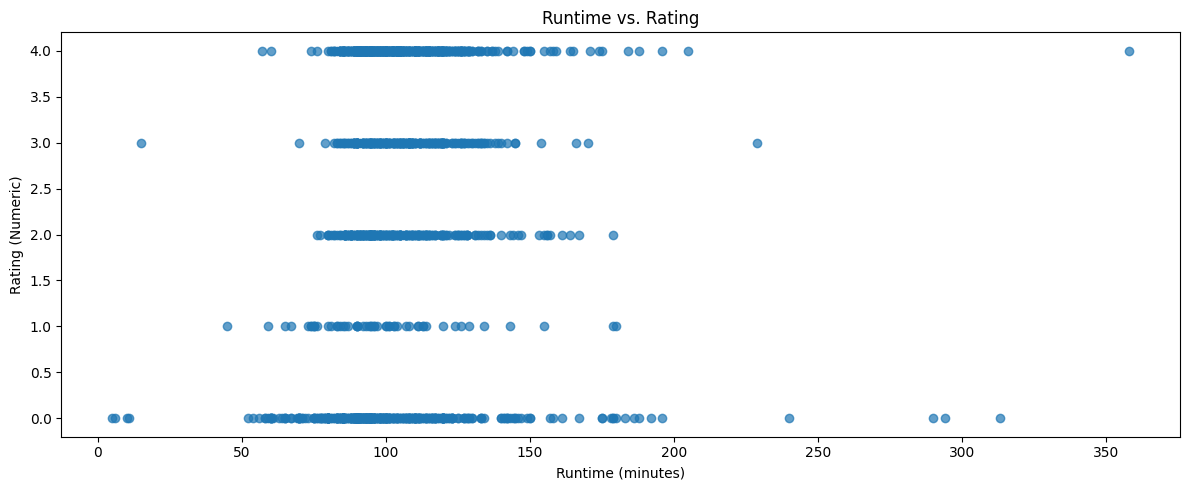

In [ ]:

# Visualization
plt.figure(figsize=(12, 5))

# Scatter plot for runtime vs. rating
plt.subplot()
plt.scatter(rt_movies_info['runtime'], rt_movies_info['rating_numeric'], alpha=0.7)
plt.title('Runtime vs. Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating (Numeric)')
plt.tight_layout()
plt.show()

#####  MOVIES



In [99]:
rt_movies=pd.read_csv('zippedData/tmdb.movies.csv').drop(columns='Unnamed: 0')

##### Rotten Tomatoes Movie Dataset Overview

##### Data Structure
The `rt_movie` DataFrame contains detailed information within 26517 rows and the following columns:
- **genre_ids**: Identifier(s) for the genre(s) of the movie (integer)
- **id**: Unique identifier for each movie (integer)
- **original_language**: Language in which the movie was originally made (object)
- **original_title**: Original title of the movie (object)
- **popularity**: Popularity score of the movie (float)
- **release_date**: Date when the movie was released (object)
- **title**: Title of the movie (object)
- **vote_average**: Average rating given by viewers (float)
- **vote_count**: Number of votes received (integer)

##### Potential Analyses
1. **Popularity Analysis**: Examine how popularity scores are distributed to identify trends and assess movie appeal.
2. **Language Trends**: Analyze the performance of movies in different languages regarding ratings and popularity.
3. **Release Date Impact**: Investigate the influence of release dates on movie popularity and ratings.
4. **Rating and Votes Analysis**: Explore the relationship between average ratings and the number of votes to gauge viewer engagement.

##### Data Quality Considerations
- **Missing Values**: The dataset is complete with no missing values hence is ready for accurate and comprehensive analysis.

This dataset offers a thorough view of movie attributes, enabling in-depth exploration of factors influencing movie success and audience interaction.


In [100]:
# Display a summary of the DataFrame `rt_movies`, including the number of non-null entries, data types of each column, and memory usage.
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [101]:
# Sum up the nulls of each column
rt_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [102]:
rt_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Popularity Analysis

#### Objective
To analyze how movie popularity scores vary and to identify trends.

### Approach
1. **Examine Popularity**: Compare popularity scores of different movies.
2. **Identify Trends**: Observe trends or patterns in popularity.
3. **Compare Movies**: Assess which movies have higher or lower popularity.

In [133]:
# Sort the DataFrame by popularity in descending order and select the top 15
top_15_popular = rt_movies.sort_values(by='popularity', ascending=False).head(15)
top_15_popular
# Calculating weighted average
top_15_popular['weighted_average'] = (top_15_popular['vote_average'] * top_15_popular['vote_count']) / top_15_popular['vote_count'].sum()

top_15_popular.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,weighted_average
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,0.801282
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,0.502379
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,0.235350
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,0.424017
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,1.034855


### Visualization
- **Type**: Horizontal Bar Chart
- **Purpose**: Display the popularity scores for easy comparison.



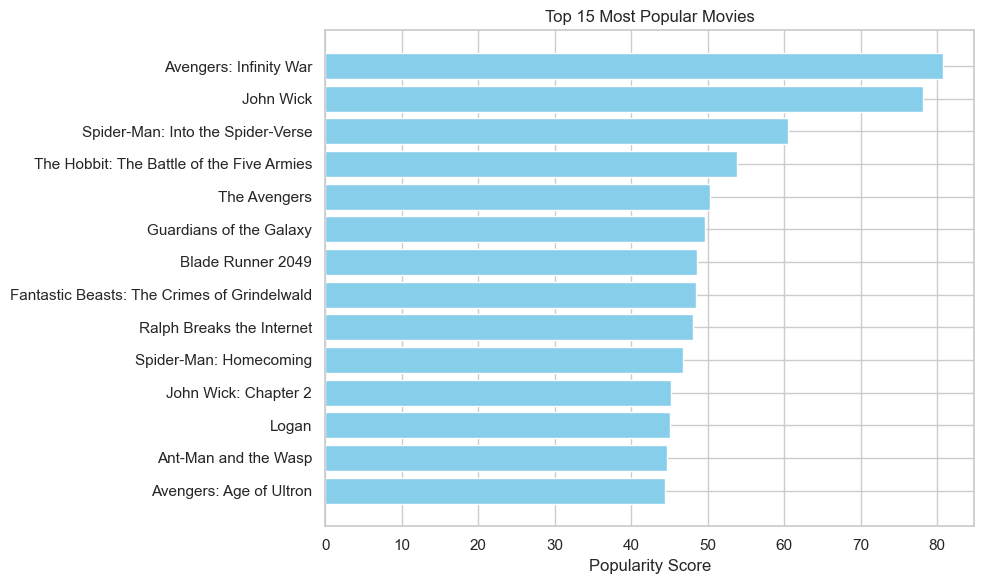

In [134]:

# Plotting popularity
plt.figure(figsize=(10, 6))
plt.barh(top_15_popular['title'], top_15_popular['popularity'], color='skyblue')
plt.xlabel('Popularity Score')
plt.title('Top 15 Most Popular Movies')
plt.gca().invert_yaxis()  # Invert y-axis to show the most popular movie on top
plt.tight_layout()
plt.show()

#### MERGED DATA

#### Combining Movie Data for Comprehensive Analysis

In this analysis, we merge two datasets: one with detailed movie information (synopsis, rating, genre, director, writer, release dates) and another with financial data (production budgets, gross earnings). This allows for a thorough understanding of factors influencing movie performance.

#### Recommendation and Purpose of Analysis

#### 1. Budget vs. Earnings
**Recommendation:** Compare production budgets to gross earnings to assess financial performance.
**Purpose:** Identify high-return investments and improve cost management by calculating profit (worldwide gross minus production budget).


Combining these datasets provides a holistic view of movie performance, considering qualitative and quantitative factors. This helps in making data-driven decisions to enhance profitability and audience engagement.


In [120]:
# Merging the dataframes on 'id'
combined_df = pd.merge(rt_movies_info, rt_budgets, on='id', how='left')

# 1. Budget vs. Earnings
combined_df['profit'] = combined_df['worldwide_gross'] - combined_df['production_budget']
budget_vs_earnings = combined_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'profit']]

# 2. Release Date Impact
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'])
release_date_impact = combined_df[['movie', 'release_date', 'domestic_gross', 'worldwide_gross']].sort_values('release_date')

# 3. Gross Earnings Comparison
gross_comparison = combined_df[['movie', 'domestic_gross', 'worldwide_gross']]
gross_comparison['international_gross'] = gross_comparison['worldwide_gross'] - gross_comparison['domestic_gross']


C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7556\1163640708.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:

# Display the results
print("Budget vs. Earnings Analysis:")
budget_vs_earnings.head()


Budget vs. Earnings Analysis:


,movie,production_budget,domestic_gross,worldwide_gross,profit
0,The Great Gatsby,190000000.0,144840419.0,351040419.0,161040419.0
1,Thor,150000000.0,181030624.0,449326618.0,299326618.0
2,The Day After Tomorrow,125000000.0,186740799.0,556319450.0,431319450.0
3,Little Fockers,100000000.0,148438600.0,310650574.0,210650574.0
4,Tomb Raider,90000000.0,58250803.0,273477501.0,183477501.0


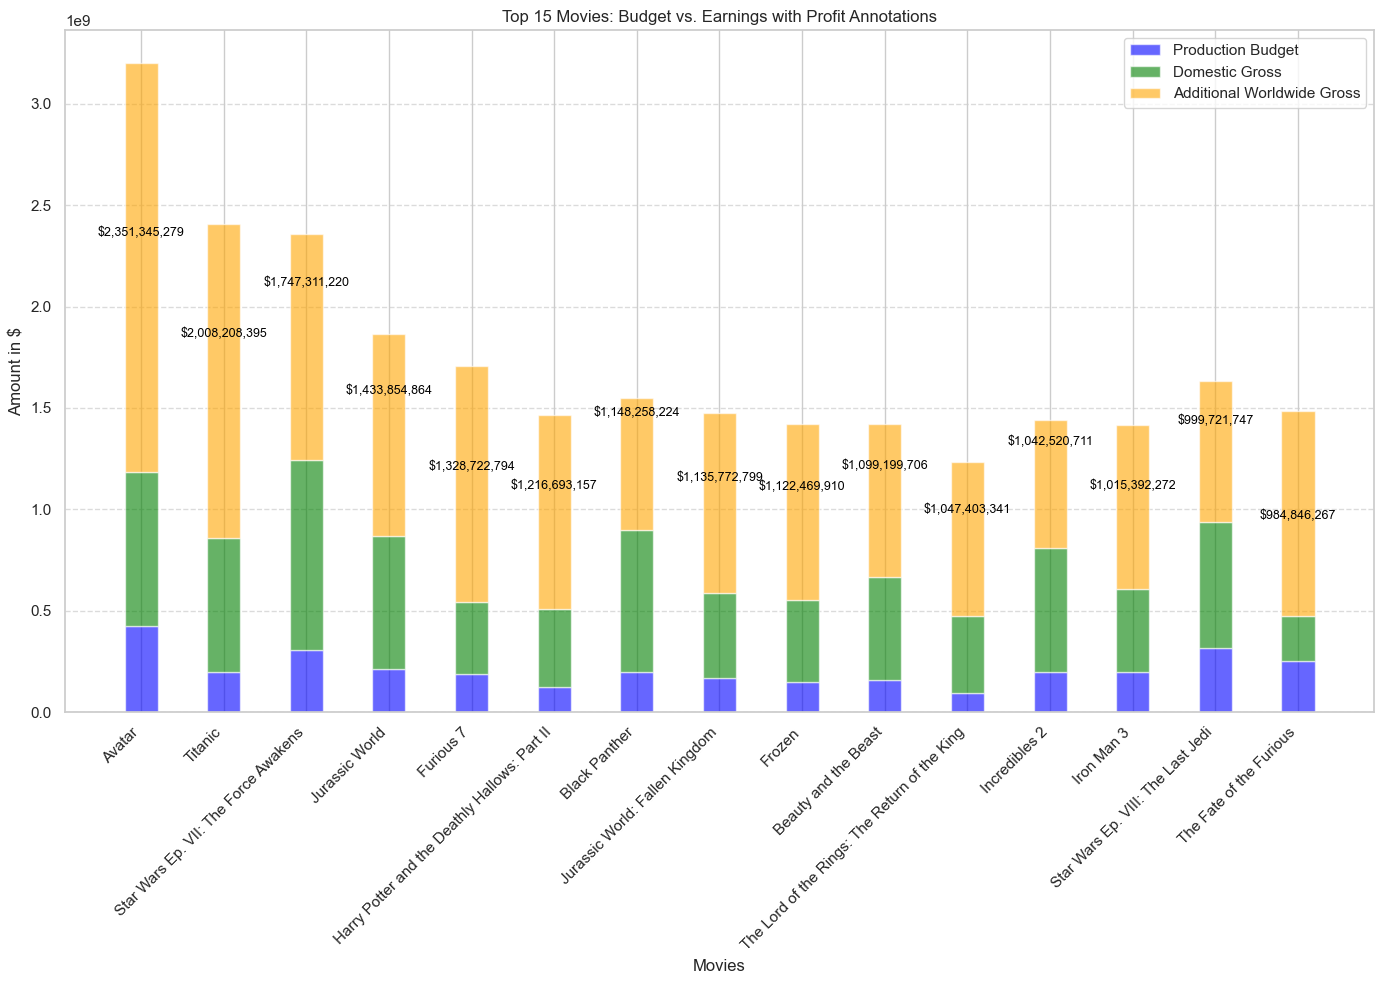

In [128]:
# Sort the DataFrame by profit in descending order and select the top 15
top_15 = budget_vs_earnings.sort_values(by='profit', ascending=False).head(15)

# Set up the plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plotting the data
bar_width = 0.4
index = range(len(top_15))

# Bar for production budget
plt.bar(index, top_15['production_budget'], bar_width, label='Production Budget', color='blue', alpha=0.6)

# Bar for domestic gross
plt.bar(index, top_15['domestic_gross'], bar_width, label='Domestic Gross', bottom=top_15['production_budget'], color='green', alpha=0.6)

# Bar for worldwide gross minus domestic gross (to avoid double counting)
plt.bar(index, top_15['worldwide_gross'] - top_15['domestic_gross'], bar_width,
        label='Additional Worldwide Gross', bottom=top_15['domestic_gross'] + top_15['production_budget'], color='orange', alpha=0.6)

# Adding profit labels
for i, (profit, budget, domestic) in enumerate(zip(top_15['profit'], top_15['production_budget'], top_15['domestic_gross'])):
    plt.text(i, budget + domestic + (profit / 2), f"${profit:,.0f}", ha='center', va='center', fontsize=9, color='black')

# Adding labels and title
plt.xlabel('Movies')
plt.ylabel('Amount in $')
plt.title('Top 15 Movies: Budget vs. Earnings with Profit Annotations')
plt.xticks(index, top_15['movie'], rotation=45, ha='right')
plt.legend()

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#####  MOVIE BUDGETS



In [110]:
rt_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv')

##### Rotten Tomatoes Budget Dataset Overview

##### Data Structure
The `rt_budget` DataFrame includes 5,782 entries with the following columns:
- **id**: Unique identifier for each movie (integer)
- **release_date**: Date when the movie was released (object)
- **movie**: Title of the movie (object)
- **production_budget**: Reported production budget of the movie (object)
- **domestic_gross**: Reported domestic gross earnings of the movie (object)
- **worldwide_gross**: Reported worldwide gross earnings of the movie (object)

##### Potential Analyses
1. **Budget vs. Earnings**: Analyze the relationship between production budgets and domestic or worldwide gross earnings to assess financial performance.
2. **Release Date Impact**: Study how the release date influences the gross earnings of movies, both domestically and globally.
3. **Gross Earnings Comparison**: Compare domestic and worldwide gross earnings to evaluate the international success of movies.

##### Data Quality Considerations
- **Missing Values**: The dataset contains no missing values across all columns.With complete data, the dataset is well-suited for accurate analysis of movie budgets and earnings.

it provides essential financial information about movies, supporting detailed analysis of budget and earnings metrics.


In [111]:
# Display a summary of the DataFrame `rt_budgets`, including number of non-null entries with the corresponding data types of each column, and memory usage.
rt_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [174]:
rt_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Analysis: Budget vs. Earnings

The goal of this analysis is to evaluate the relationship between a movie's production budget and its earnings, both domestically and worldwide. This helps us understand the financial performance of films based on their production costs.

##### Steps:

1. **Data Preparation:**
   - Clean the data by removing formatting symbols (such as dollar signs) from the columns related to production budget and earnings.
   - Convert these cleaned columns into numerical values for further analysis.


In [112]:
def clean_money_column(df, column_name):
    df[column_name] = df[column_name].replace('[\$,]', '', regex=True).astype(float)

# Clean and convert columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    clean_money_column(rt_budgets, col)
rt_budgets.head()


<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7556\282846361.py:2: SyntaxWarning:

invalid escape sequence '\$'



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09



2. **Visualizing the Relationship:**
   - Use scatter plots to visualize the relationship between the production budget and earnings.
     - **Budget vs Domestic Gross:** This scatter plot shows how the production budget of a movie correlates with its earnings in the domestic market.
     - **Budget vs Worldwide Gross:** This scatter plot illustrates the relationship between the production budget and the movie's global earnings.


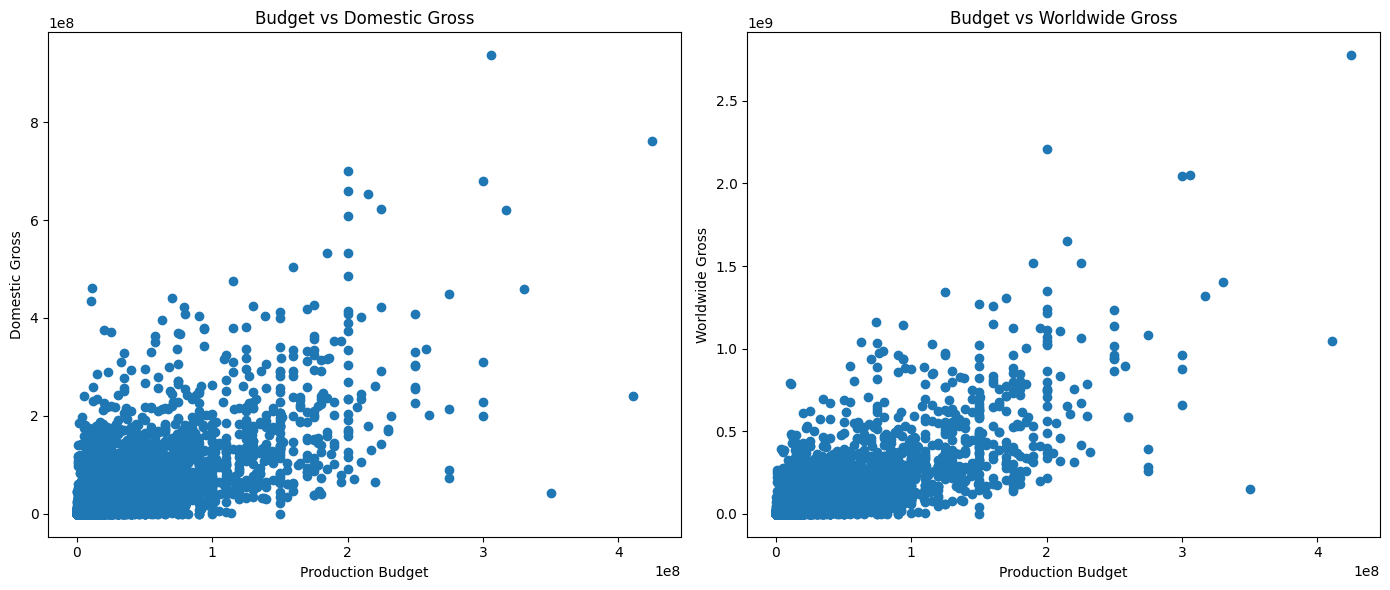

In [113]:
# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(rt_budgets['production_budget'], rt_budgets['domestic_gross'])
plt.title('Budget vs Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')

plt.subplot(1, 2, 2)
plt.scatter(rt_budgets['production_budget'], rt_budgets['worldwide_gross'])
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

plt.tight_layout()
plt.show()




3. **Quantifying the Relationship:**
   - Calculate correlation coefficients to quantify the strength of the relationship between production budget and earnings.
     - **Correlation between Production Budget and Domestic Gross:** This value indicates how strongly the production budget is related to domestic earnings.
     - **Correlation between Production Budget and Worldwide Gross:** This value shows the relationship between the production budget and worldwide earnings.




In [180]:
# Correlations
budget_domestic_corr = rt_budgets[['production_budget', 'domestic_gross']].corr().iloc[0, 1]
budget_worldwide_corr = rt_budgets[['production_budget', 'worldwide_gross']].corr().iloc[0, 1]

print(f'Correlation between Production Budget and Domestic Gross: {budget_domestic_corr:.2f}')
print(f'Correlation between Production Budget and Worldwide Gross: {budget_worldwide_corr:.2f}')

Correlation between Production Budget and Domestic Gross: 0.69
Correlation between Production Budget and Worldwide Gross: 0.75


#### Analysis: Release Date Impact on Gross Earnings

The objective of this analysis is to examine how the release dates of movies influence their gross earnings. By investigating the release dates, we can determine if there are specific times of the year or particular years that tend to yield higher earnings.

#### Steps:

1. **Prepare the Data:**
   - Convert the `release_date` column to a datetime format. This allows us to perform time-based operations and extractions.


In [114]:
# Convert release_date to datetime
rt_budgets['release_date'] = pd.to_datetime(rt_budgets['release_date'])

   - Extract relevant features from the `release_date`, such as month and year. These features will help us analyze the impact of the timing of the release on earnings.


In [115]:


# Extract month and year
rt_budgets['release_month'] = rt_budgets['release_date'].dt.strftime('%B')
rt_budgets['release_year'] = rt_budgets['release_date'].dt.year



2. **Analyze the Impact:**
   - Use bar charts ,scatter plots or line charts to visualize any patterns in earnings based on the release month or year.
     - **Release Month vs Gross Earnings:** Scatter plots or line charts can show if there are certain months where earnings are consistently higher or lower.
     - **Release Year vs Gross Earnings:** These visualizations can help identify trends over the years in terms of earnings.


C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7556\1688562628.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



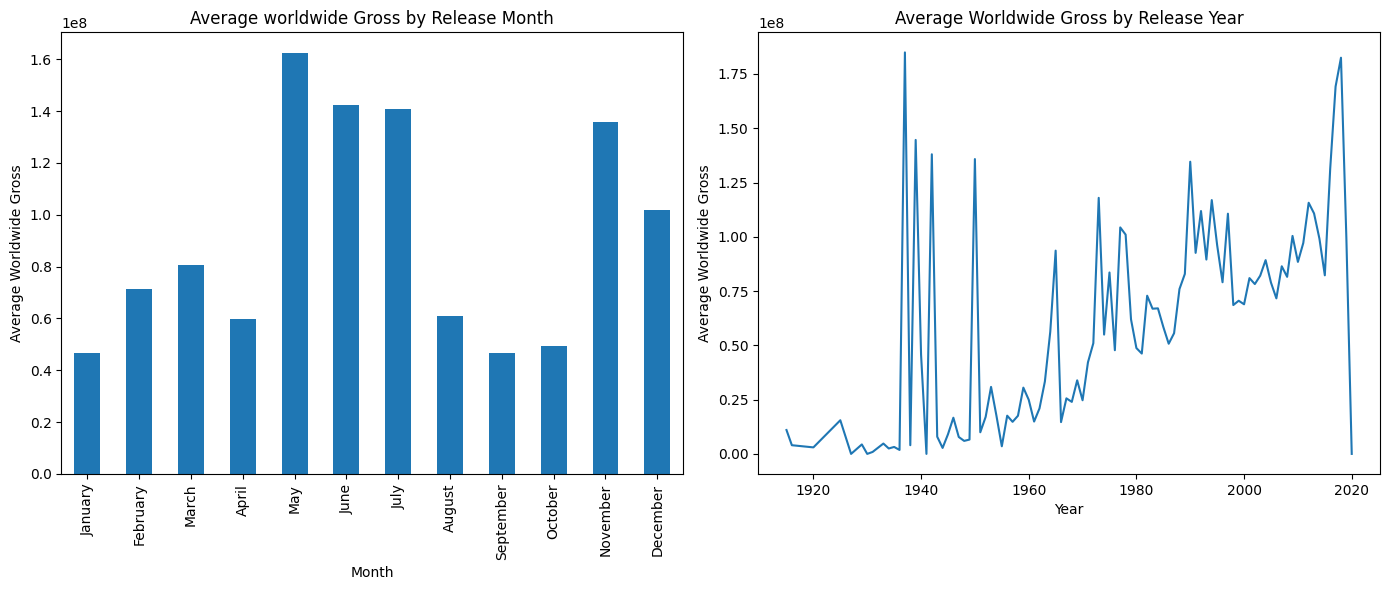

In [116]:
# Set the release_month column as a categorical type with months ordered from Jan to Dec
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
rt_budgets['release_month'] = pd.Categorical(rt_budgets['release_month'], categories=month_order, ordered=True)


# Scatter plots or line charts
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
rt_budgets.groupby('release_month')['worldwide_gross'].mean().plot(kind='bar')
plt.title('Average worldwide Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Worldwide Gross')

plt.subplot(1, 2, 2)
rt_budgets.groupby('release_year')['worldwide_gross'].mean().plot(kind='line')
plt.title('Average Worldwide Gross by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross')

plt.tight_layout()
plt.show()

   - Compute summary statistics to observe if specific months or years tend to yield higher earnings. This includes calculating average earnings for each month and year to find any significant patterns.


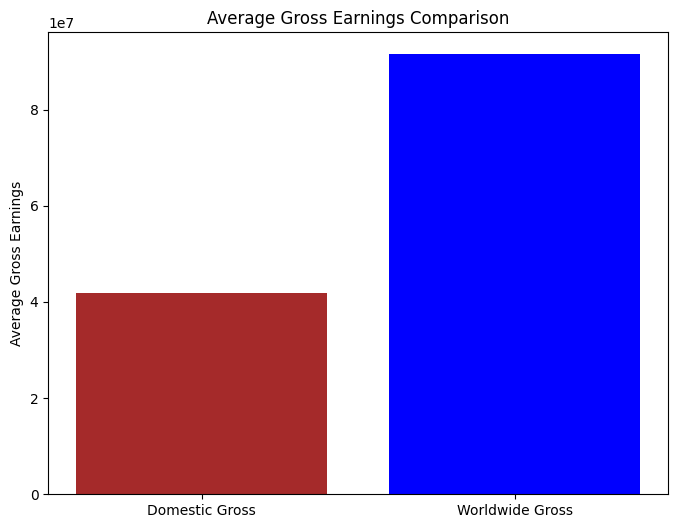

In [117]:
# Aggregate statistics
average_domestic_gross = rt_budgets['domestic_gross'].mean()
average_worldwide_gross = rt_budgets['worldwide_gross'].mean()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Domestic Gross', 'Worldwide Gross'], [average_domestic_gross, average_worldwide_gross], color=['brown', 'blue'])
plt.title('Average Gross Earnings Comparison')
plt.ylabel('Average Gross Earnings')
plt.show()


 we aim to uncover any patterns or trends that might suggest optimal times for releasing movies. This information can be valuable for planning release strategies and maximizing gross earnings.


#### IMDB Database



In [148]:
 # Path to the zip file
zip_file_path = 'zippedData/im.db.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the database file to a temporary file
    with zip_ref.open('im.db') as db_file:
        with open('temp_im.db', 'wb') as temp_db_file:
            temp_db_file.write(db_file.read())

# Connect to the temporary database file
conn = sqlite3.connect('temp_im.db')

In [149]:
# Load the movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [150]:

# Load the movie_ratings table
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [151]:

# Merge the movie_basics and movie_ratings tables on movie_id
mv_ratin= pd.merge(movie_basics, movie_ratings, on='movie_id')
mv_ratin


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


##### Movie Ratings Dataset Overview

##### Data Structure
The `mv_ratin` DataFrame contains 73,856 entries with the following columns:
- **movie_id**: Unique identifier for each movie (object)
- **primary_title**: Main title of the movie (object)
- **original_title**: Original title of the movie (object)
- **start_year**: Release year of the movie (integer)
- **runtime_minutes**: Duration of the movie in minutes (float), with some missing values
- **genres**: Genre(s) of the movie (object), with some missing values
- **averagerating**: Average rating of the movie (float)
- **numvotes**: Total number of votes received (integer)

##### Potential Analyses
1. **Rating Distribution**: Analyze how movie ratings are spread out.
2. **Runtime vs. Rating**: Examine how the length of movies relates to their ratings.
3. **Genre Analysis**: Look into the genres and their effect on ratings and vote counts.
4. **Votes and Ratings**: Investigate the relationship between the number of votes and average ratings.

##### Data Quality Considerations
- **Missing Values**: The dataset has missing values in:
  - **runtime_minutes**
  - **genres**

  Addressing these missing values is important for ensuring accurate analysis.

it provides detailed information on movie ratings, helping to analyze ratings, movie length, and genres.


In [152]:

mv_ratin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [153]:
# Check percentage of misisng values in dataframe (mv_ratin)
mv_ratin.isna().sum()/len(mv_ratin)*100

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

According to the missing value statistics, the runtime_minutes column has 10% missing values, and genre column has about 0.57% missing values.combined they are less than the 25 % (max for dropping null rows) common threshold percentage .While this approach will reduce the dataset size, it ensures that the remaining data is complete for these critical fields.

In [154]:
mv_ratin.dropna(subset=['runtime_minutes','genres'])
mv_ratin.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


##### *descriptive analytics*

In [155]:
mv_ratin.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


##### Genre Distribution Analysis

Understanding the frequency of each genre helps to pinpoint which genres are most common. This information is useful for making data-driven decisions, such as targeting specific genres in marketing or content strategies.


In [160]:
# Perform distribution analysis for genres .
genre_distribution = mv_ratin['genres'].value_counts().sort_values(ascending=False).head(20)
top_10 = genre_distribution.head(20)
top_10

genres
Drama                    11612
Documentary              10313
Comedy                    5613
Horror                    2692
Comedy,Drama              2617
Thriller                  1555
Drama,Romance             1510
Comedy,Romance            1236
Comedy,Drama,Romance      1208
Horror,Thriller           1004
Drama,Thriller             990
Action                     979
Romance                    717
Biography,Documentary      694
Documentary,Drama          582
Documentary,Music          579
Comedy,Horror              579
Action,Crime,Drama         562
Crime,Drama,Thriller       504
Crime,Drama                494
Name: count, dtype: int64

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7556\859551361.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




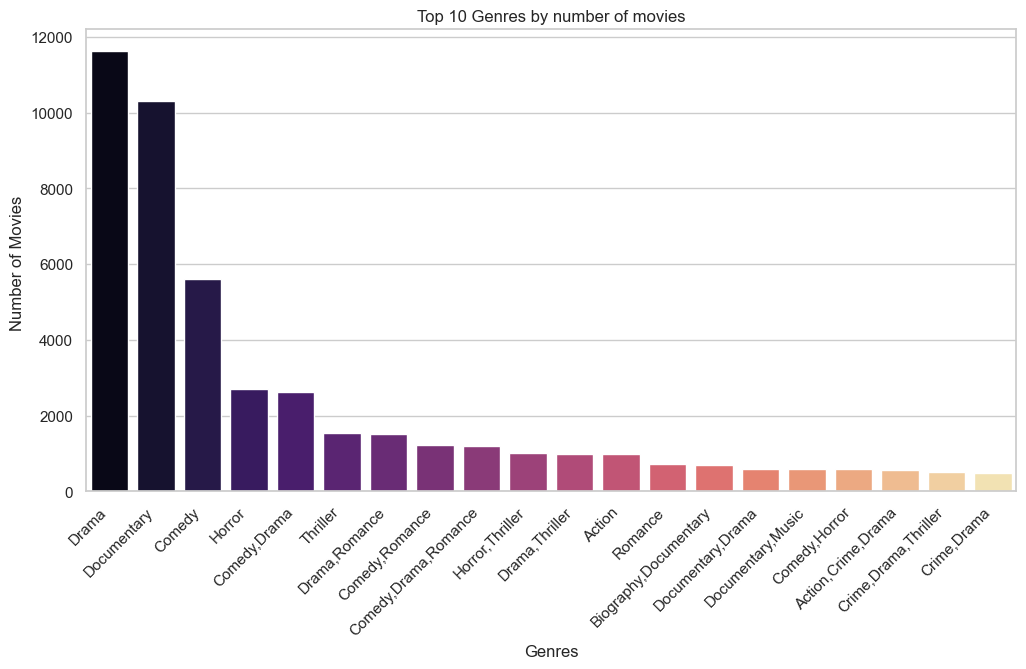

In [161]:
# Plotting the top 20 genres with the highest average weighted ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette='magma')
plt.title('Top 10 Genres by number of movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies ')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Start Year Distribution Analysis

Analyzing the distribution of movie release years reveals trends over time, such as changes in movie production volume or shifts in industry focus. This analysis aids in understanding historical patterns and temporal shifts in movie releases.


In [157]:
# distribution analysis for start_year
start_year_distribution = mv_ratin['start_year'].value_counts().sort_index()
start_year_distribution


start_year
2010    6792
2011    7389
2012    7680
2013    7990
2014    8371
2015    8494
2016    8721
2017    8713
2018    7526
2019    2180
Name: count, dtype: int64

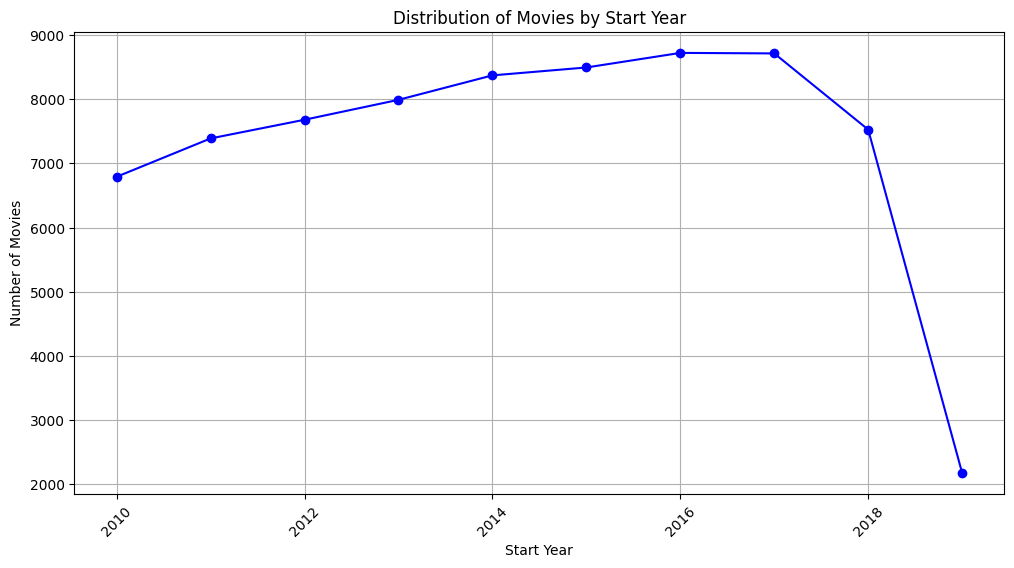

In [131]:
# Plotting the distribution as a line plot
plt.figure(figsize=(12, 6))
plt.plot(start_year_distribution.index, start_year_distribution.values, marker='o', linestyle='-', color='b')
plt.title('Distribution of Movies by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### Correlation Analysis

This analysis examines the relationships between movie runtime, average rating, and number of votes. Understanding these correlations helps to identify how these factors influence each other, providing insights into viewer preferences and movie attributes.


In [106]:
# Perform correlation analysis
correlation_matrix = mv_ratin[['runtime_minutes', 'averagerating', 'numvotes']].corr()
correlation_matrix.head()

,runtime_minutes,averagerating,numvotes
runtime_minutes,1.000000,-0.006963,0.012472
averagerating,-0.006963,1.000000,0.044478
numvotes,0.012472,0.044478,1.000000


##### Loading the movie_basics Table
The `movie_basics` DataFrame is loaded from the database to access foundational movie details. This table provides essential data about movies, such as titles and genres, which are crucial for subsequent analyses.


In [107]:
# Load the movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None



##### Loading the movie_ratings Table
The `movie_ratings` DataFrame is loaded to obtain rating information for movies. This dataset includes ratings and vote counts, which are essential for evaluating movie performance and analyzing viewer engagement.



In [108]:

# Load the movie_ratings table
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


##### Calculating Weighted Ratings for Movies

To achieve a balanced rating system that considers both the number of votes and the average rating, we apply a weighted rating formula. This method helps prevent movies with a small number of high ratings from disproportionately affecting the results.

The weighted rating formula is as follows:

$\text{weighted\_rating} = \left( \frac{v}{v+m} \times R \right) + \left( \frac{m}{m+v} \times C \right) $


Where:
- \( R \) represents the average rating of the movie (from the `averagerating` column).
- \( v \) denotes the number of votes the movie has received (from the `numvotes` column).
- \( m \) is the minimum number of votes required to be considered for the weighted rating. We set this as the 75th percentile of the number of votes.
- \( C \) is the mean rating across all movies.

Implementing this formula creates a new column `weighted_rating` in the `movie_ratings` DataFrame, offering a more accurate assessment of each movie's rating.

In [109]:
C = movie_ratings['averagerating'].mean()
m = movie_ratings['numvotes'].quantile(0.75)  # Using the 75th percentile as the cutoff

def weighted_rating(x, m=m, C=C):
    v = x['numvotes']
    R = x['averagerating']
    return (v/(v+m) * R) + (m/(m+v) * C)

movie_ratings['weighted_rating'] = movie_ratings.apply(weighted_rating, axis=1)


##### Merge Movie Basics with Ratings
Merging `movie_basics` with `movie_ratings` integrates movie details with their ratings. This combined dataset enables a detailed analysis of how genres perform in terms of ratings and viewer feedback.







In [110]:

# Merge the movie_basics and movie_ratings tables on movie_id
df_genre_performance = pd.merge(movie_basics[['movie_id', 'genres']], movie_ratings, on='movie_id')
df_genre_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   genres           73052 non-null  object 
 2   averagerating    73856 non-null  float64
 3   numvotes         73856 non-null  int64  
 4   weighted_rating  73856 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [111]:
# Remove rows from `df_genre_performance` where the 'genres' column has missing values.

df_genre_performance=df_genre_performance.dropna(subset='genres')
df_genre_performance.head()

,movie_id,genres,averagerating,numvotes,weighted_rating
0,tt0063540,"Action,Crime,Drama",7.0,77,6.475848
1,tt0066787,"Biography,Drama",7.2,43,6.447475
2,tt0069049,Drama,6.9,4517,6.866666
3,tt0069204,"Comedy,Drama",6.1,13,6.322473
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119,6.382368


##### Split Genres into Separate Rows
The `df_genre_performance` DataFrame is adjusted to handle multiple genres per movie by splitting the genre column into separate rows. This transformation allows each genre to be analyzed individually, providing a clearer view of how each genre contributes to movie ratings. By expanding genres into separate rows, the dataset supports more granular analysis of genre-specific performance and facilitates detailed comparisons across different genres.


In [112]:

# Split genres into separate rows
df_genre_performance = df_genre_performance.assign(genres=df_genre_performance['genres'].str.split(',')).explode('genres')
df_genre_performance

,movie_id,genres,averagerating,numvotes,weighted_rating
0,tt0063540,Action,7.0,77,6.475848
0,tt0063540,Crime,7.0,77,6.475848
0,tt0063540,Drama,7.0,77,6.475848
1,tt0066787,Biography,7.2,43,6.447475
1,tt0066787,Drama,7.2,43,6.447475
...,...,...,...,...,...
73851,tt9913084,Documentary,6.2,6,6.329963
73852,tt9914286,Drama,8.7,136,7.102941
73852,tt9914286,Family,8.7,136,7.102941
73853,tt9914642,Documentary,8.5,8,6.392515



next step involves calculating the weighted ratings for each genre and sorting them in descending order. By grouping the dataset by genre and computing the mean rating, we can identify which genres generally receive higher ratings. This analysis highlights trends and preferences in movie ratings across different genres, providing insights into which genres are favored by audiences.


In [101]:

# Calculate and sort the mean 'averagerating' for each genre in descending order.
genre_ratings = df_genre_performance.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False).head()
# Display the top genres with the highest average ratings.
genre_ratings.head(10)


NameError: name 'df_genre_performance' is not defined

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_9004\385786137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='magma')


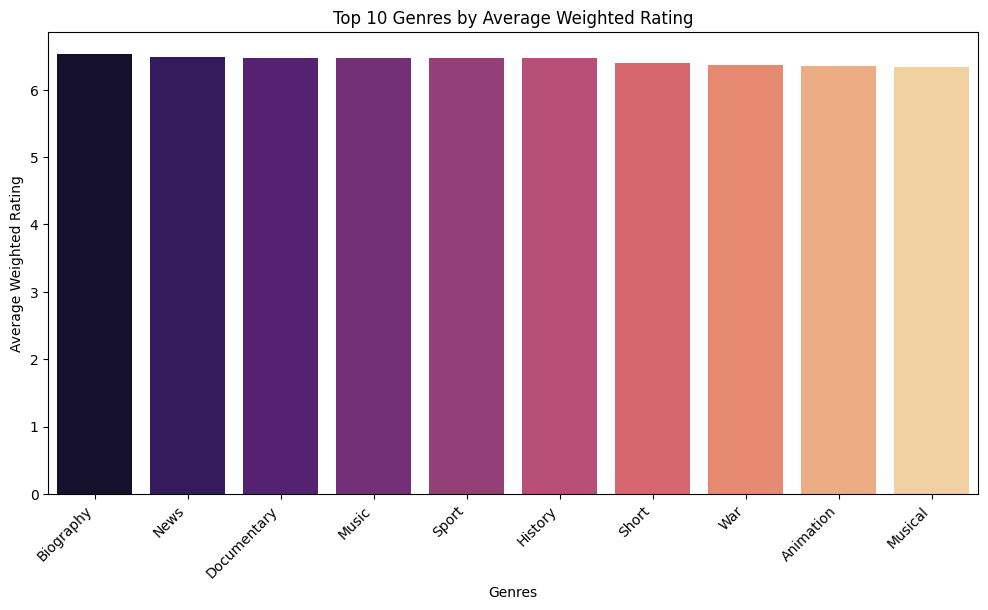

In [135]:
# Select the top 10 genres
top_genres = genre_ratings.head(10)

# Plotting the top 10 genres with the highest average weighted ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='magma')
plt.title('Top 10 Genres by Average Weighted Rating')
plt.xlabel('Genres')
plt.ylabel('Average Weighted Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


we then calculate the average number of votes for each genre by grouping the data accordingly. Sorting these averages in descending order helps identify which genres receive the most engagement from viewers. This insight is valuable for understanding genre popularity and the level of audience interaction.


In [114]:
genre_votes = df_genre_performance.groupby('genres')['numvotes'].mean().sort_values(ascending=False)
genre_votes.head()

genres
Adventure    22067.746660
Sci-Fi       19474.292384
Action       14476.485690
Fantasy      12387.443086
Animation     8808.549627
Name: numvotes, dtype: float64

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_9004\109814554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre_votes.values, y=top_genre_votes.index, palette='magma')


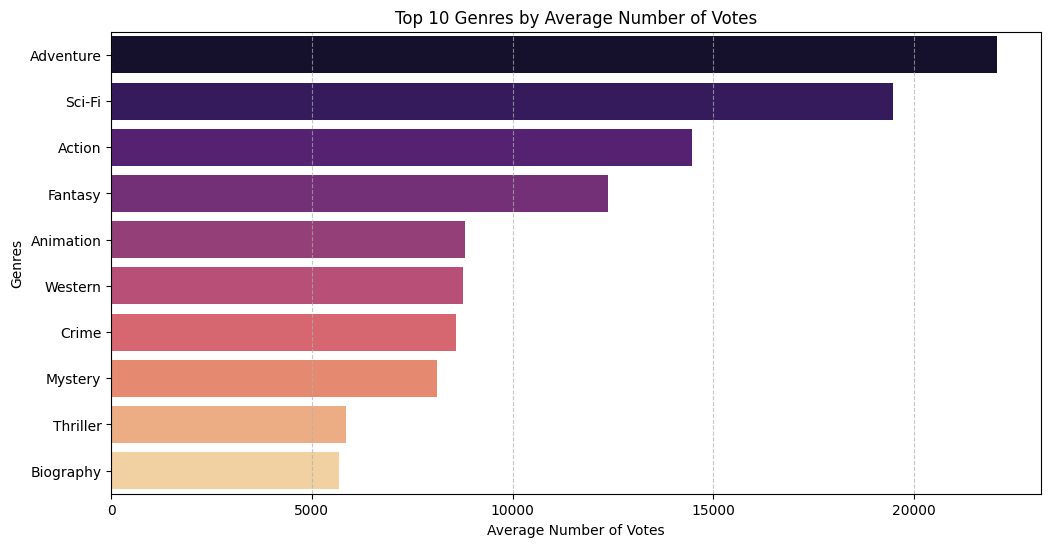

In [134]:
# Select the top genres based on average number of votes
top_genre_votes = genre_votes.head(10)

# Plotting the top genres with the highest average number of votes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genre_votes.values, y=top_genre_votes.index, palette='magma')
plt.title('Top 10 Genres by Average Number of Votes')
plt.xlabel('Average Number of Votes')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### Genre Distribution and Performance Trends
checking how often each genre appears in the dataset. This will help me see which genres are most common and track performance trends. It's important for understanding genre popularity and overall representation.


In [115]:

# 2. Genre distribution and performance trends
genre_distribution = df_genre_performance['genres'].value_counts()
genre_distribution.head()

genres
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Name: count, dtype: int64

##### Merge Tables using SQL query


we combine data from three tables: `movie_basics`, `movie_ratings`, and `movie_akas`. The query joins these tables on `movie_id` to gather movie titles, genres, ratings, vote counts, regional titles, and regions. 

Sorting by `movie_id` ensures a structured dataset allowing analysis of regional performance and ratings effectively.


In [116]:
# SQL query to merge the tables
query = """
    SELECT
        mb.movie_id,
        mb.primary_title,
        mb.genres,
        mr.averagerating,
        mr.numvotes,
        ma.region,
        ma.title
    FROM
        movie_basics mb
    JOIN
        movie_ratings mr ON mb.movie_id = mr.movie_id
    JOIN
        movie_akas ma ON mb.movie_id = ma.movie_id
    ORDER BY
        mb.movie_id
"""
# Load the result of the SQL query into a DataFrame
df_regional_performance = pd.read_sql_query(query, conn)
df_regional_performance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       261806 non-null  object 
 1   primary_title  261806 non-null  object 
 2   genres         260621 non-null  object 
 3   averagerating  261806 non-null  float64
 4   numvotes       261806 non-null  int64  
 5   region         218341 non-null  object 
 6   title          261806 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.0+ MB



#### Calculating Weighted Ratings for Movies

In this section, we aim to compute a weighted rating for each movie in our dataset. This weighted rating takes into account not just the average rating (`averagerating`) for each movie, but also the number of votes (`numvotes`) the movie has received.

The rationale behind this is that a movie with a high average rating but a low number of votes should not necessarily be considered better than a movie with a slightly lower average rating but a much higher number of votes.

To achieve this, we use a version of the formula used by IMDb for their Top Rated 250 Titles. This formula calculates a weighted rating that properly reflects both the average rating and the number of votes.

After we calculate this weighted rating, we add it as a new column to our DataFrame. This allows us to better compare and analyze the movies in our dataset.


In [117]:
# Calculate the mean average rating
C = df_regional_performance['averagerating'].mean()

# Determine the 75th percentile of the number of votes
m = df_regional_performance['numvotes'].quantile(0.75)

# Function to calculate the weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['numvotes']  # Number of votes
    R = x['averagerating']  # Average rating
    return (v/(v+m) * R) + (m/(m+v) * C)  # Weighted rating formula

# Apply the weighted rating function to the DataFrame
df_regional_performance['weighted_rating'] = df_regional_performance.apply(weighted_rating, axis=1)


In [118]:
# Checking the percentage of missing values in DataFrame (df_regional_perfomance)
df_regional_performance.isna().sum()/len(df_regional_performance)

movie_id           0.000000
primary_title      0.000000
genres             0.004526
averagerating      0.000000
numvotes           0.000000
region             0.166020
title              0.000000
weighted_rating    0.000000
dtype: float64

##### Handling Missing Values in the DataFrame


Missing data can often be problematic in data analysis and can lead to biased or incorrect results. One common strategy to deal with missing data is to fill the missing values with a placeholder.

In this case, we will fill missing 'region' values with the placeholder 'Unknown' and missing 'genres' values with 'Unknown'. This means that if a movie doesn't have a region or genre specified, we will still be able to include it in our analysis without having to drop the row entirely.

By using this strategy, we ensure that our dataset remains as complete as possible, allowing for more accurate analysis and results.



In [119]:


#  Fill missing region values with a placeholder (e.g., 'Unknown')
df_cleaned = df_regional_performance.fillna({'region': 'Unknown','genres':'Unkown'})


##### Grouping by Region

Grouping the data by region allows us to analyze how movies perform in different regions. By calculating these statistics, we can gain insights into regional preferences and trends.

we will group our DataFrame by the 'region' column and calculate various statistics for each group. Specifically, we will compute the mean average rating, the mean number of votes, and the mean weighted rating for each region.



In [120]:
# Group by 'region' and calculate relevant statistics
region_analysis = df_cleaned.groupby('region').agg({
    'movie_id': 'count',  # Count of movies
    'averagerating': 'mean',  # Mean average rating
    'numvotes': 'mean',  # Mean number of votes
    'weighted_rating': 'mean'  # Mean weighted rating
}).reset_index().rename(columns={'movie_id': 'movie_count'})
region_analysis.head()


,region,movie_count,averagerating,numvotes,weighted_rating
0,AD,2,6.500000,99.000000,6.263923
1,AE,53,6.750943,3175.641509,6.298562
2,AF,28,7.250000,516.857143,6.292426
3,AG,3,7.400000,10.333333,6.274465
4,AL,178,6.591011,116025.943820,6.440717


#####  Average rating by genre and region


To analyze the average rating by genre and region, I plan to explore trends in movie ratings across various genres and regions. This analysis will help identify which genres are most popular in different regions and how regional preferences influence movie ratings.

Given that we are analyzing trends in movie ratings, the first step is to ensure that our data is clean and complete. I'll begin by handling any missing values in the genres, region, and averagerating columns to ensure the integrity of our analysis.


In [121]:
# Drop rows with missing values in 'genres', 'region', or 'averagerating'
df_cleaned = df_regional_performance.dropna(subset=['genres', 'region', 'averagerating'])


Next, since movies can fall into multiple genres, I'll split these genres into separate rows. This approach ensures that we can accurately analyze each genre's performance without any overlap.

In [123]:
# Create a copy of the cleaned DataFrame
df_exploded = df_cleaned.copy()

# Split the 'genres' column into lists of genres
df_exploded['genres'] = df_exploded['genres'].str.split(',')

# Explode the 'genres' column into separate rows for each genre
df_exploded = df_exploded.explode('genres')


After organizing the data, I'll group it by both genre and region. By calculating the weighted rating for each group, we can uncover patterns and insights about the popularity and reception of various genres in different regions.


In [125]:
# Group the DataFrame by 'genres' and 'region'
# Aggregate the data to calculate the mean of 'averagerating' for each group
# Reset the index to turn the grouped object back into a DataFrame
# Rename the 'averagerating' column to 'avg_rating' for clarity
genre_region_analysis = df_exploded.groupby(['genres', 'region']).agg({
    'weighted_rating': 'mean'
}).reset_index()
genre_region_analysis.head()

,genres,region,weighted_rating
0,Action,AE,6.546234
1,Action,AF,6.299385
2,Action,AL,6.560095
3,Action,AM,6.183902
4,Action,AN,6.277006



Finally, to make these insights easily interpretable, I'll create visualizations that highlight the differences in weighted ratings across genres and regions. These visualizations will help to clearly demonstrate how regional preferences impact the perception and popularity of different movie genres.

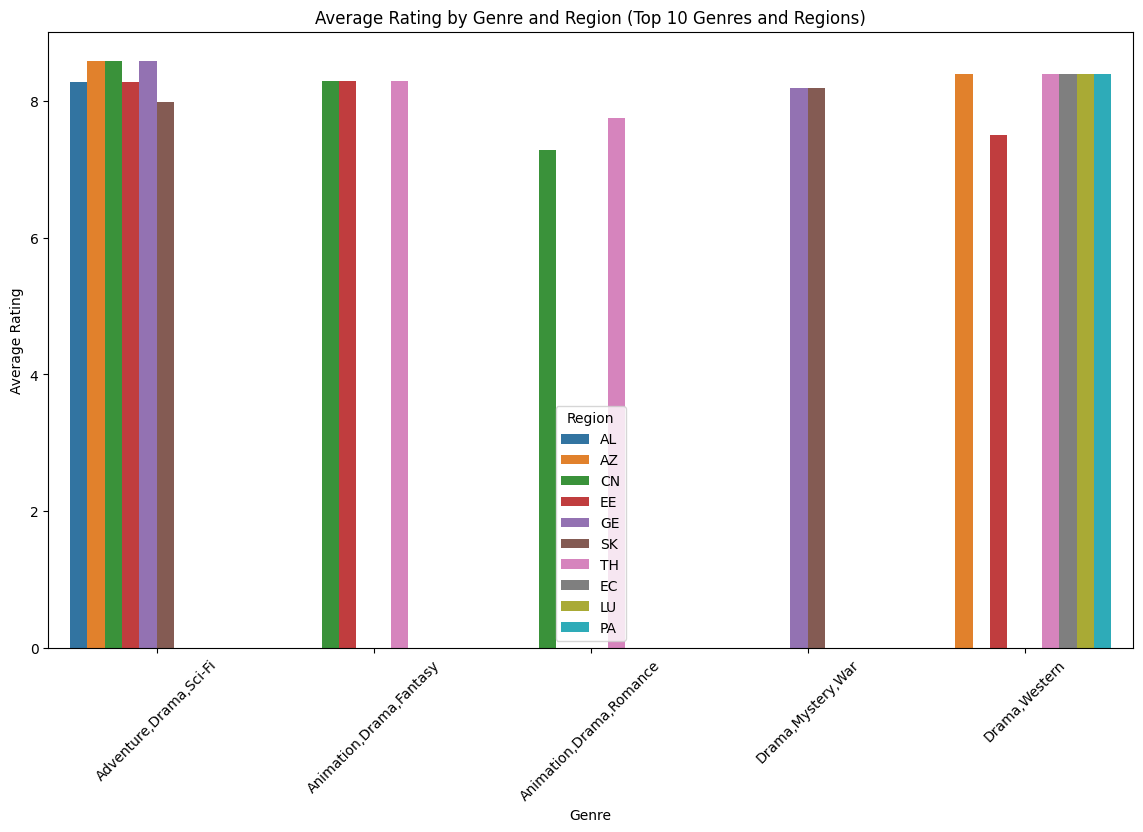

In [130]:

# Calculate the average rating by genre and region
genre_region_analysis = df_cleaned.groupby(['genres', 'region']).agg({'weighted_rating': 'mean'}).reset_index()

# Get the top 10 genres by average rating
top_10_genres = genre_region_analysis.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False).head(10).index

# Filter the dataset to include only the top 10 genres
top_10_genre_region_analysis = genre_region_analysis[genre_region_analysis['genres'].isin(top_10_genres)]

# Calculate the average rating for each region
top_regions = top_10_genre_region_analysis.groupby('region')['weighted_rating'].mean().sort_values(ascending=False).head(10).index

# Filter the dataset to include only the top regions
filtered_genre_region_analysis = top_10_genre_region_analysis[top_10_genre_region_analysis['region'].isin(top_regions)]

# Visualize the data
plt.figure(figsize=(14, 8))
sns.barplot(x='genres', y='weighted_rating', hue='region', data=filtered_genre_region_analysis)
plt.title('Average Weighted Rating by Genre and Region (Top 10 Genres and Regions)')
plt.xlabel('Genre')
plt.ylabel('Average Weighted Rating')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

In [ ]:
query_writers = """
    SELECT
        mb.movie_id,
        mb.primary_title,
        mr.averagerating,
        mr.numvotes,
        w.person_id AS writer_id,
        p.primary_name AS writer_name,
        p.primary_profession AS writer_profession
    FROM
        movie_basics mb
    JOIN
        movie_ratings mr ON mb.movie_id = mr.movie_id
    JOIN
        writers w ON mb.movie_id = w.movie_id
    LEFT JOIN
        persons p ON w.person_id = p.person_id
    ORDER BY
        mb.movie_id
"""

df_writers = pd.read_sql_query(query_writers, conn)

In [ ]:
df_writers.head()

,movie_id,primary_title,averagerating,numvotes,writer_id,writer_name,writer_profession
0,tt0063540,Sunghursh,7.0,77,nm0023551,Abrar Alvi,"writer,actor,director"
1,tt0063540,Sunghursh,7.0,77,nm0347899,Gulzar,"music_department,writer,soundtrack"
2,tt0063540,Sunghursh,7.0,77,nm1194313,Mahasweta Devi,writer
3,tt0063540,Sunghursh,7.0,77,nm1391276,Anjana Rawail,"writer,costume_designer"
4,tt0069049,The Other Side of the Wind,6.9,4517,nm0000080,Orson Welles,"actor,director,writer"


In [ ]:
df_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169303 entries, 0 to 169302
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           169303 non-null  object 
 1   primary_title      169303 non-null  object 
 2   averagerating      169303 non-null  float64
 3   numvotes           169303 non-null  int64  
 4   writer_id          169303 non-null  object 
 5   writer_name        169302 non-null  object 
 6   writer_profession  169138 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.0+ MB


In [ ]:
df_writers.isna().sum()/len(df_writers)*100


movie_id             0.000000
primary_title        0.000000
averagerating        0.000000
numvotes             0.000000
writer_id            0.000000
writer_name          0.000591
writer_profession    0.097458
dtype: float64

In [198]:
df_writers.dropna(subset=['writer_name','writer_profession'],inplace=True)
df_writers= df_writers.drop_duplicates(subset=['movie_id', 'writer_id'])

#### 1. Writer Activity and Output
- **Recommendation:** Count the number of unique movies each writer has contributed to in order to assess their productivity.

- **Purpose:** Analyze the activity and output of writers to identify the most productive writers and understand their impact on movie performance.


In [199]:
# Count the number of unique movies each writer has contributed to
writer_activity = df_writers.groupby('writer_name')['movie_id'].nunique().reset_index()
writer_activity.columns = ['writer_name', 'movie_count']
writer_activity = writer_activity.sort_values(by='movie_count', ascending=False)

writer_activity.head()


,writer_name,movie_count
73282,William Shakespeare,110
63731,Sergey A.,40
45273,Mark Monroe,32
17674,Dheeraj Rattan,32
40337,Larry Rosen,32


##### 2. Writer Collaboration Patterns
To explore writer collaboration patterns, we'll identify co-writers and analyze their frequency of collaboration.

##### Grouping Writers by Movie

First, we aim to group the writers associated with each movie. This involves aggregating all writers' names for each movie into separate lists. This provides a structured view of the collaboration among writers for each movie.



In [200]:
# Group by 'movie_id' and collect all 'writer_name' values into lists
movie_writers = df_writers.groupby('movie_id')['writer_name'].apply(list)


##### Counting Co-Writer Pairs

Next, we want to determine the frequency of co-writer collaborations. To achieve this, we will:

1. **Initialize a Frequency Counter**: Prepare a dictionary to store the frequency of each co-writer pair.
2. **Generate Co-Writer Pairs**: For each movie, generate all possible pairs of writers.
3. **Sort and Count**: Ensure each pair is ordered consistently and count the frequency of each pair across all movies.


In [201]:
# Group by 'movie_id' and collect all 'writer_name' values into lists
movie_writers = df_writers.groupby('movie_id')['writer_name'].apply(list)

# Initialize a dictionary to store the frequency of co-writer pairs
pair_counts = {}

# Iterate through the lists of writers for each movie
for writers in movie_writers:
    # Generate all possible pairs of co-writers for the current list of writers
    for pair in combinations(writers, 2):
        sorted_pair = tuple(sorted(pair))
        if sorted_pair in pair_counts:
            pair_counts[sorted_pair] += 1
        else:
            pair_counts[sorted_pair] = 1



##### Creating a Collaboration DataFrame

After counting the co-writer pairs, we convert the frequency dictionary into a DataFrame. This will help in organizing the data for further analysis.

##### Sorting by Collaboration Frequency

Finally, we sort the by the frequency of co-writer collaborations in descending order. This helps in identifying the most frequent co-writer pairs, providing insights into common collaborative patterns among writers.


In [202]:

# Convert the dictionary to a DataFrame
collaboration_counts = pd.DataFrame(list(pair_counts.items()), columns=['pair', 'count'])

# Sort the pairs by their frequency in descending order
collaboration_counts = collaboration_counts.sort_values(by='count', ascending=False)

In [203]:

# Display the top co-writer pairs
collaboration_counts.head()

,pair,count
426,"(Jack Kirby, Stan Lee)",18
8042,"(Farhad Samji, Sajid)",16
12148,"(Claudia Boderke, Lars Mering)",13
7808,"(Carlo Vanzina, Enrico Vanzina)",13
14612,"(Gopalakrishna Paruchuri, Venkateswara Rao Par...",12


#### Analyzing Writer Professions

To gain insights into the distribution of writer professions:

##### Extract Individual Professions
We need to split each entry in the `writer_profession` column into separate professions. This will help in identifying the distinct roles that writers have.


In [204]:
# Split the writer_profession into multiple roles
df_writers['professions'] = df_writers['writer_profession'].str.split(',')



##### Flatten the Data
By expanding the split professions into individual rows, we can analyze each profession separately. This allows us to see how frequently each profession appears.


In [205]:
# Explode the professions into separate rows
df_professions = df_writers.explode('professions')



##### Count Profession Frequencies
Counting the occurrences of each profession will give us an overview of the most common roles among writers.

#### Summarize and Sort
We organize the profession counts into a DataFrame to easily view and analyze the data. Sorting this DataFrame will highlight the most prevalent professions.


In [206]:
# Count the occurrences of each profession
profession_counts = df_professions['professions'].value_counts().reset_index()
profession_counts.columns = ['profession', 'count']

profession_counts.head(10)

,profession,count
0,writer,99678
1,director,60865
2,producer,45165
3,actor,25907
4,editor,10925
5,miscellaneous,10471
6,cinematographer,6379
7,actress,5611
8,assistant_director,5311
9,camera_department,3449


In [207]:
# SQL query to merge the tables for directors
query_directors = """
    SELECT
        mb.movie_id,
        mb.primary_title,
        mr.averagerating,
        mr.numvotes,
        d.person_id AS director_id,
        p.primary_name AS director_name,
        p.primary_profession AS director_profession
    FROM
        movie_basics mb
    JOIN
        movie_ratings mr ON mb.movie_id = mr.movie_id
    JOIN
        directors d ON mb.movie_id = d.movie_id
    LEFT JOIN
        persons p ON d.person_id = p.person_id
    ORDER BY
        mb.movie_id

""" 
df_directors = pd.read_sql_query(query_directors, conn)

In [208]:
df_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181389 entries, 0 to 181388
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   movie_id             181389 non-null  object 
 1   primary_title        181389 non-null  object 
 2   averagerating        181389 non-null  float64
 3   numvotes             181389 non-null  int64  
 4   director_id          181389 non-null  object 
 5   director_name        181387 non-null  object 
 6   director_profession  181262 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.7+ MB


In [189]:
df_directors.isna().sum()/len(df_directors)*100

movie_id               0.000000
primary_title          0.000000
averagerating          0.000000
numvotes               0.000000
director_id            0.000000
director_name          0.001103
director_profession    0.070015
dtype: float64

In [190]:
df_directors.dropna(subset=['director_name','director_profession'],inplace=True)

In [221]:
# Calculate the mean average rating
C = df_directors['averagerating'].mean()

# Determine the 75th percentile of the number of votes
m = df_directors['numvotes'].quantile(0.75)

# Function to calculate the weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['numvotes']  # Number of votes
    R = x['averagerating']  # Average rating
    return (v/(v+m) * R) + (m/(m+v) * C)  # Weighted rating formula

# Apply the weighted rating function to the DataFrame
df_directors['weighted_rating'] = df_directors.apply(weighted_rating, axis=1)


In [222]:
df_directors= df_directors.drop_duplicates(subset=['movie_id', 'director_id'])
df_directors.head()

,movie_id,primary_title,averagerating,numvotes,director_id,director_name,director_profession,weighted_rating
0,tt0063540,Sunghursh,7.0,77,nm0712540,Harnam Singh Rawail,"director,writer,producer",6.489072
4,tt0066787,One Day Before the Rainy Season,7.2,43,nm0002411,Mani Kaul,"director,writer,actor",6.460501
5,tt0069049,The Other Side of the Wind,6.9,4517,nm0000080,Orson Welles,"actor,director,writer",6.869080
7,tt0069204,Sabse Bada Sukh,6.1,13,nm0611531,Hrishikesh Mukherjee,"director,editor,writer",6.328786
8,tt0100275,The Wandering Soap Opera,6.5,119,nm0749914,Raoul Ruiz,"director,writer,producer",6.389749


In [225]:
df_directors.drop_duplicates()
top_20_dir=df_directors.sort_values(by='weighted_rating',ascending=False).head(20)
top_20_dir

,movie_id,primary_title,averagerating,numvotes,director_id,director_name,director_profession,weighted_rating
164325,tt7131622,Once Upon a Time ... in Hollywood,9.7,5600,nm0000233,Quentin Tarantino,"writer,actor,producer",9.548734
148772,tt5963218,Aloko Udapadi,9.5,6509,nm8359417,Chathra Weeraman,"special_effects,director",9.376831
148773,tt5963218,Aloko Udapadi,9.5,6509,nm8529623,Bharatha Hettiarachchi,"special_effects,director,assistant_director",9.376831
170397,tt7738784,Peranbu,9.4,9629,nm3591496,Ram,"director,writer,actor",9.318344
170401,tt7738784,Peranbu,9.4,9629,nm9988436,Amudhavan Karuppiah,"director,actor",9.318344
170399,tt7738784,Peranbu,9.4,9629,nm6041686,Anjana Krishnakumar,"assistant_director,director,writer",9.318344
150204,tt6058226,Ekvtime: Man of God,9.6,2604,nm3123304,Nikoloz Khomasuridze,"producer,director,writer",9.299921
146147,tt5813916,The Mountain II,9.3,100568,nm3809021,Alper Caglar,"producer,writer,editor",9.292250
138793,tt5354160,Aynabaji,9.3,18470,nm2755490,Amitabh Reza Chowdhury,"miscellaneous,director,actor",9.258288
42622,tt2170667,Wheels,9.3,17308,nm1919905,Donavon Warren,"producer,actor,director",9.255530


#### Director Weighted Rating Distribution
To analyze the distribution of weighted ratings for movies directed by different directors, we can use a box plot or histogram.

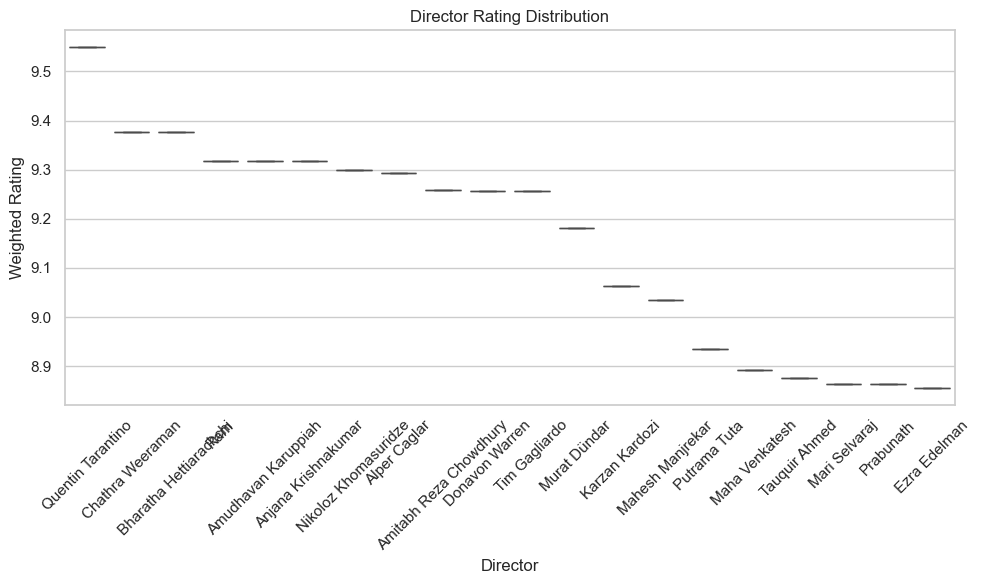

In [228]:
# Plotting rating distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_20_dir, x='director_name', y='weighted_rating')
plt.title('Director Rating Distribution')
plt.xlabel('Director')
plt.ylabel('Weighted Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  Director Average Rating Distribution
To analyze the distribution of average ratings for movies directed by different directors, we can use a box plot or histogram.

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7556\2836171908.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




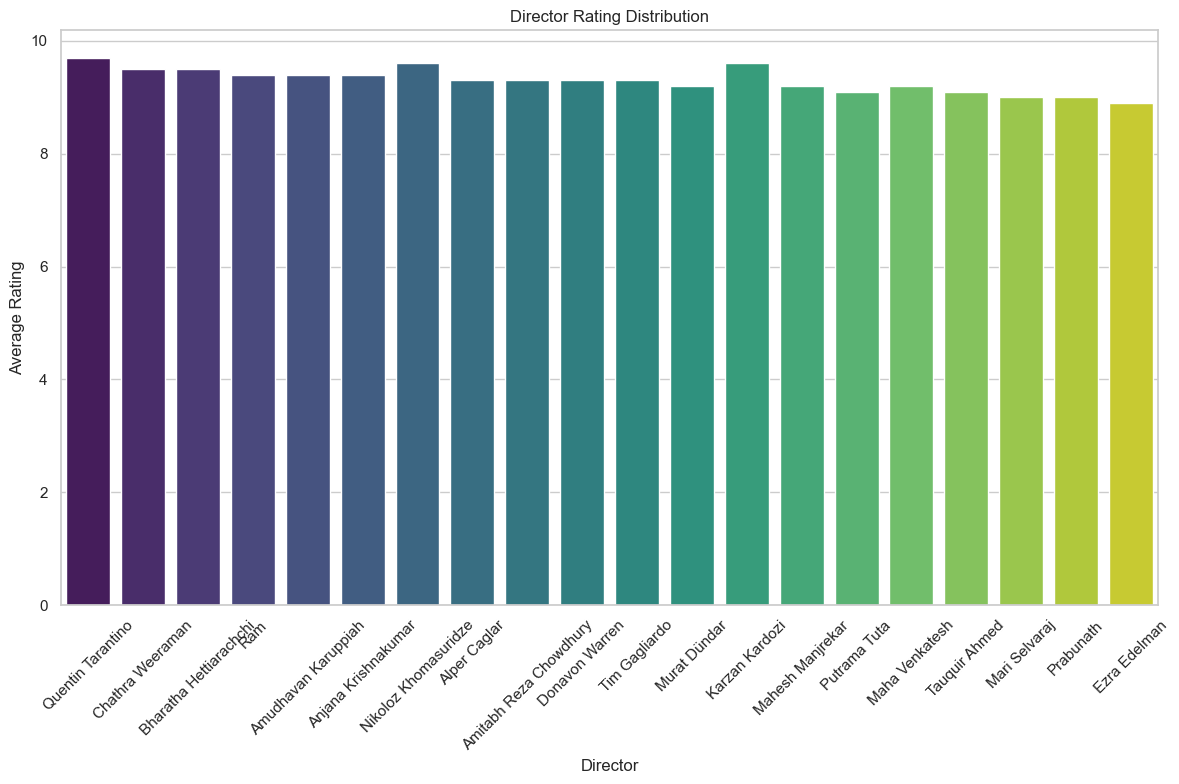

In [242]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(data=top_20_dir, x='director_name', y='averagerating', palette='viridis')

# Add title and labels
plt.title('Director Rating Distribution')
plt.xlabel('Director')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit everything nicely
plt.tight_layout()
# Show the plot
plt.show()


#### 2. Director Popularity
To examine the number of votes received by movies directed by different directors, we can use a bar plot.

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_7556\3882239785.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




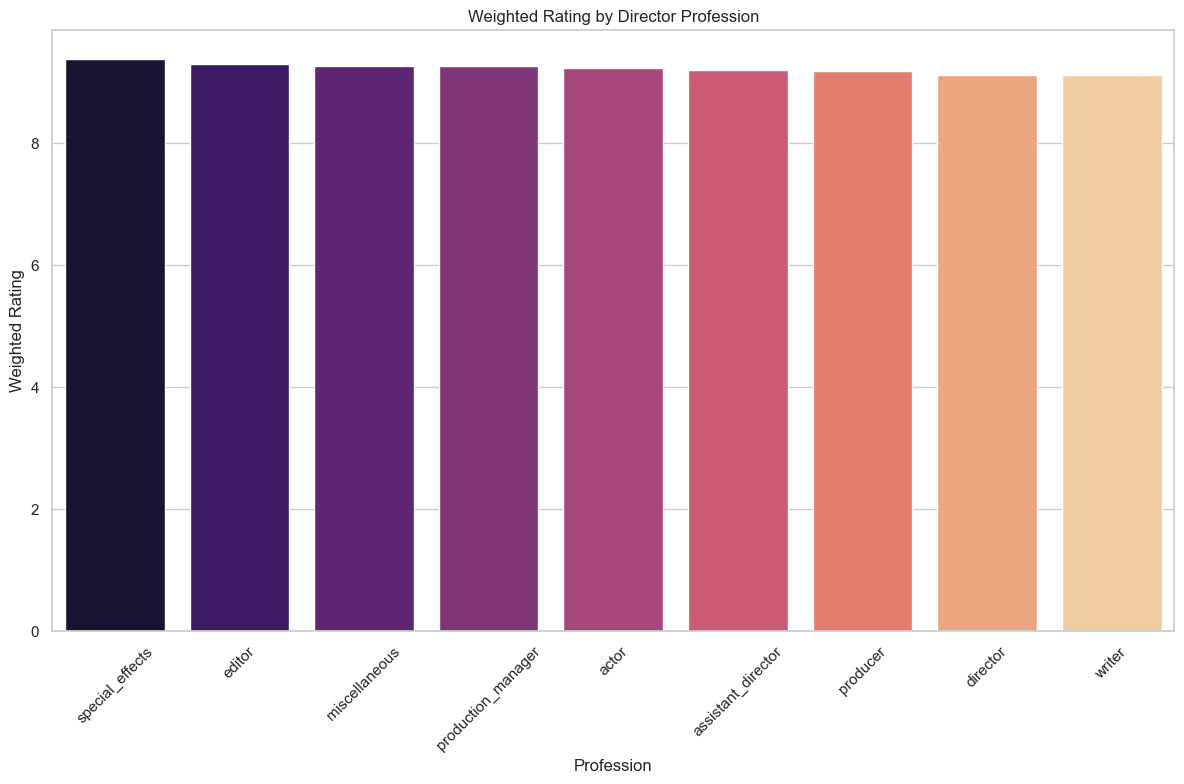

In [249]:
# Splitting 'director_profession' into individual professions
top_20_dir['professions'] = top_20_dir['director_profession'].str.split(',')

# Flattening the list of professions and creating a DataFrame
profession_ratings = []
for index, row in top_20_dir.iterrows():
    for prof in row['professions']:
        profession_ratings.append({'profession': prof.strip(), 'weighted_rating': row['weighted_rating']})

df_professions = pd.DataFrame(profession_ratings)

# Grouping by profession and calculating the mean rating
profession_mean_ratings = df_professions.groupby('profession')['weighted_rating'].mean().reset_index().sort_values(by='weighted_rating',ascending=False)

# Plotting average rating for each profession
plt.figure(figsize=(12, 8))
sns.barplot(data=profession_mean_ratings, x='profession', y='weighted_rating', palette='magma')

# Adding title and labels
plt.title('Weighted Rating by Director Profession')
plt.xlabel('Profession')
plt.ylabel('Weighted Rating')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to fit everything nicely
plt.tight_layout()

# Display the plot
plt.show()
